# **Feature Engineering Notebook**

## Objectives

* Engineer features for regression model

## Inputs

* outputs/datasets/cleaned/TestSetCleaned.csv
* outputs/datasets/cleaned/TrainSetCleaned.csv

## Outputs
 
* Generate a list with variables to engineer

---

# Change working directory

Accessing the current directory

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/milestone-project-heritage-housing-issues/jupyter_notebooks'

Making sure working in the child of the workspace directory

In [2]:
os.chdir('/workspaces/milestone-project-heritage-housing-issues')
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/milestone-project-heritage-housing-issues'

---

# Load Cleaned Data

* Train Set

In [4]:
import pandas as pd
train_set_path = "outputs/datasets/cleaned/TrainSetCleaned.csv"
TrainSet = pd.read_csv(train_set_path)
TrainSet.head()

FirFlrSF  SecFlrSF  BedroomAbvGr  BsmtExposure  BsmtFinSF1  BsmtFinType1  \
0      1828         0             3             3          48             0   
1       894         0             2             1           0             1   
2       964         0             2             1         713             5   
3      1689         0             3             1        1218             6   
4      1541         0             3             1           0             1   

   BsmtUnfSF  GarageArea  GarageFinish  GarageYrBlt  ...  LotArea  \
0       1774         774             1         2007  ...    11694   
1        894         308             0         1979  ...     6600   
2        163         432             1         1979  ...    13360   
3        350         857             2         2002  ...    13265   
4       1541         843             2         2001  ...    13704   

   LotFrontage  MasVnrArea  OpenPorchSF  OverallCond  OverallQual  \
0           90         452          108            5            9   
1           60           0            0            5            5   
2           80           0            0            7            5   
3           70         148           59            5            8   
4          118         150           81            5            7   

   TotalBsmtSF  YearBuilt  YearRemodAdd  SalePrice  
0         1822       2007          2007     314813  
1          894       1962          1962     109500  
2          876       1921          2006     163500  
3         1568       2002          2002     271000  
4         1541       2001          2002     205000  

[5 rows x 22 columns]

* Test Set

In [5]:
test_set_path = "outputs/datasets/cleaned/TestSetCleaned.csv"
TestSet = pd.read_csv(test_set_path)
TestSet.head()

FirFlrSF  SecFlrSF  BedroomAbvGr  BsmtExposure  BsmtFinSF1  BsmtFinType1  \
0      2515         0             4             1        1219             4   
1       958       620             3             1         403             3   
2       979       224             3             1         185             2   
3      1156       866             4             1         392             3   
4       525         0             3             1           0             1   

   BsmtUnfSF  GarageArea  GarageFinish  GarageYrBlt  ...  LotArea  \
0        816         484             0         1979  ...    32668   
1        238         240             1         1979  ...     9490   
2        524         352             1         1979  ...     7015   
3        768         505             3         1979  ...    10005   
4        525         264             1         1979  ...     1680   

   LotFrontage  MasVnrArea  OpenPorchSF  OverallCond  OverallQual  \
0           70           0            0            3            6   
1           79           0            0            7            6   
2           70         161            0            4            5   
3           83         299          117            5            7   
4           21         381            0            5            6   

   TotalBsmtSF  YearBuilt  YearRemodAdd  SalePrice  
0         2035       1957          1975     200624  
1          806       1941          1950     133000  
2          709       1950          1950     110000  
3         1160       1977          1977     192000  
4          525       1971          1971      88000  

[5 rows x 22 columns]

---

# Data Exploration 

In [6]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=TrainSet, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Correlation and PPS Analysis

### Spearman Correlation

* Train Set

In [7]:
df_spearman_train = TrainSet.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head()
df_spearman_train

OverallQual    0.802395
GrLivArea      0.732180
KitchenQual    0.667671
GarageArea     0.663543
YearBuilt      0.646465
Name: SalePrice, dtype: float64

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def heatmap_corr(df, threshold, figsize, font_annot):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()

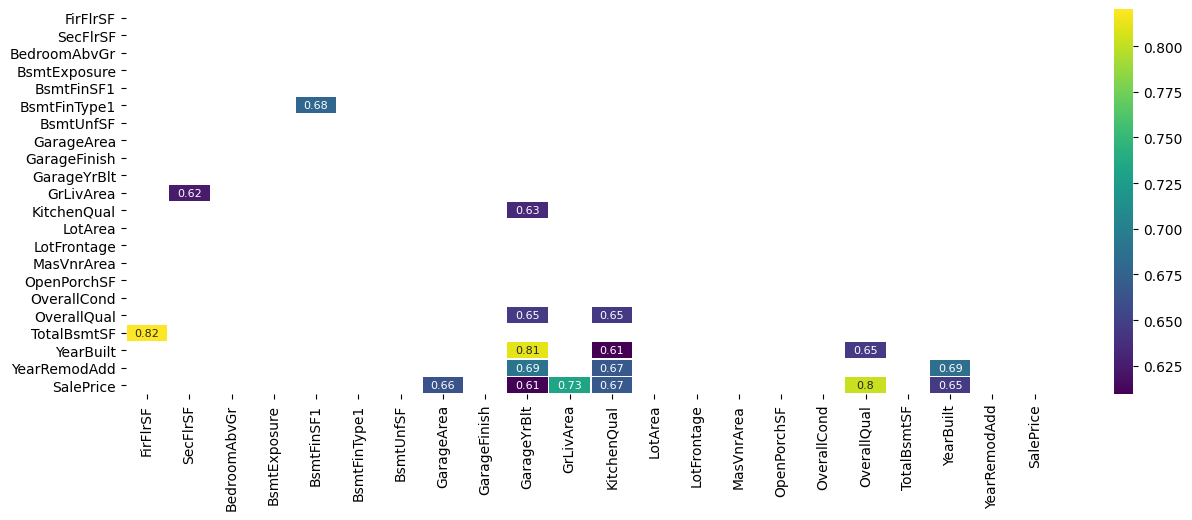

In [9]:
df_spearman_heat_train = TrainSet.corr(method='spearman')
heatmap_corr(df=df_spearman_heat_train, threshold=0.6, figsize=(15, 5), font_annot=8)

* Test Set

In [10]:
df_spearman_test = TestSet.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head()
df_spearman_test

OverallQual    0.837577
GrLivArea      0.727553
KitchenQual    0.696274
YearBuilt      0.680388
GarageYrBlt    0.644547
Name: SalePrice, dtype: float64

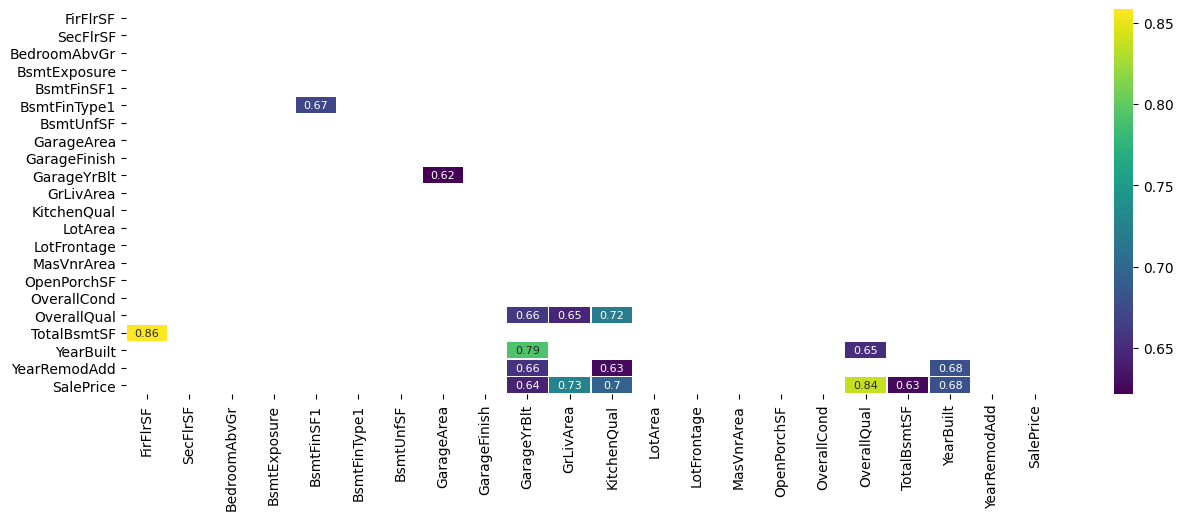

In [11]:
df_spearman_heat_test = TestSet.corr(method='spearman')
heatmap_corr(df=df_spearman_heat_test, threshold=0.6, figsize=(15, 5), font_annot=8)

### Pearson Correlation

* Train Set

In [12]:
df_pearson_train = TrainSet.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head()
df_pearson_train

OverallQual    0.790636
GrLivArea      0.721707
KitchenQual    0.655542
GarageArea     0.646603
TotalBsmtSF    0.635535
Name: SalePrice, dtype: float64

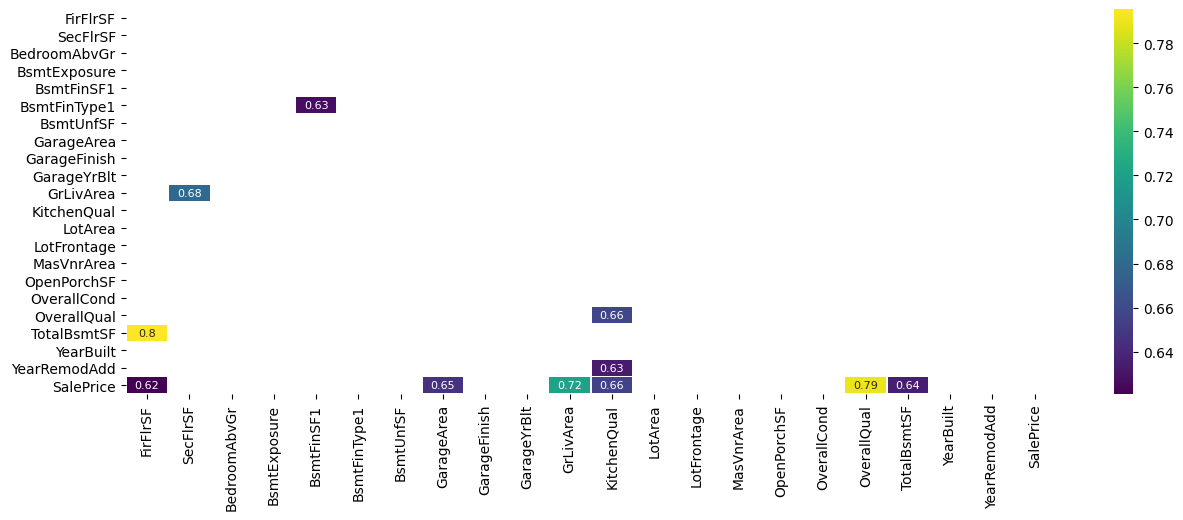

In [13]:
df_pearson_heat_train = TrainSet.corr(method='pearson')
heatmap_corr(df=df_pearson_heat_train, threshold=0.6, figsize=(15, 5), font_annot=8)

* Test Set

In [14]:
df_pearson_test = TestSet.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head()
df_pearson_test

OverallQual    0.792621
KitchenQual    0.676426
GrLivArea      0.665093
FirFlrSF       0.559870
TotalBsmtSF    0.558510
Name: SalePrice, dtype: float64

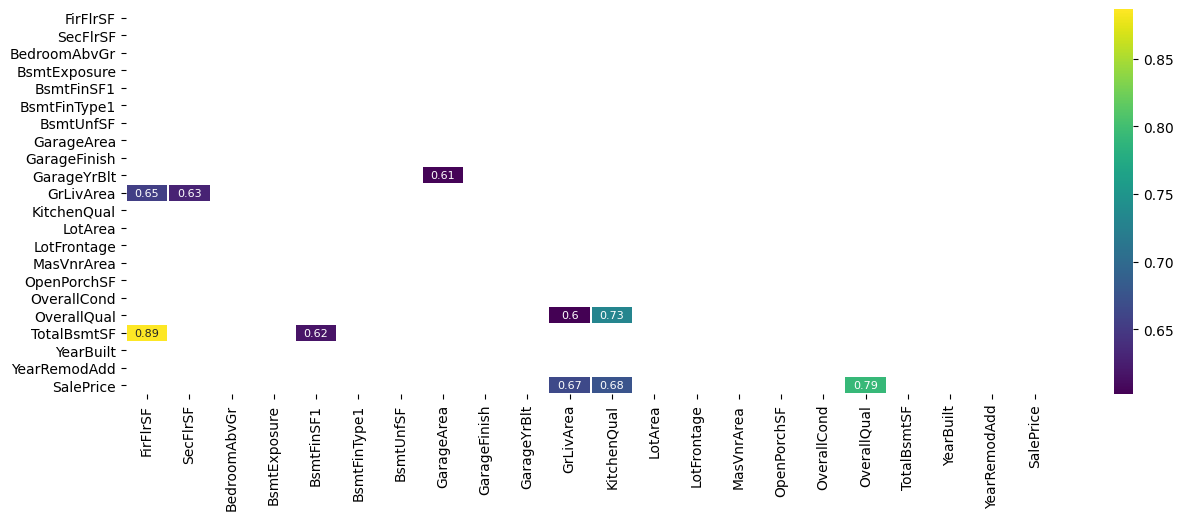

In [15]:
df_pearson_heat_test = TestSet.corr(method='pearson')
heatmap_corr(df=df_pearson_heat_test, threshold=0.6, figsize=(15, 5), font_annot=8)

* Top correlated attributes, to SalePrice

In [16]:
set(df_pearson_train[:].index.to_list() + df_pearson_test[:].index.to_list() 
                                        + df_spearman_train[:].index.to_list() 
                                        + df_spearman_test[:].index.to_list())

{'FirFlrSF',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'KitchenQual',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

I will focus on these variables and drop the others due to weaker correlation

In [17]:
TrainSet.drop(columns=['SecFlrSF', 'BedroomAbvGr', 'BsmtExposure',
                    'BsmtFinSF1', 'BsmtFinType1', 'BsmtUnfSF',
                    'GarageFinish', 'LotArea', 'LotFrontage',
                    'MasVnrArea', 'OpenPorchSF', 'OverallCond',
                    'YearRemodAdd'], inplace=True)

In [18]:
TestSet.drop(columns=['SecFlrSF', 'BedroomAbvGr', 'BsmtExposure',
                    'BsmtFinSF1', 'BsmtFinType1', 'BsmtUnfSF',
                    'GarageFinish', 'LotArea', 'LotFrontage',
                    'MasVnrArea', 'OpenPorchSF', 'OverallCond',
                    'YearRemodAdd'], inplace=True)

---

# Feature Engineering

* Custom function from the Code Institute Wakthrough Project 02

In [19]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from feature_engine import transformation as vt
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import OrdinalEncoder
sns.set(style="whitegrid")
warnings.filterwarnings('ignore')


def FeatureEngineeringAnalysis(df, analysis_type=None):
    """
    - used for quick feature engineering on numerical and categorical variables
    to decide which transformation can better transform the distribution shape
    - Once transformed, use a reporting tool, like ydata-profiling, to evaluate distributions
    """
    check_missing_values(df)
    allowed_types = ['numerical', 'ordinal_encoder', 'outlier_winsorizer']
    check_user_entry_on_analysis_type(analysis_type, allowed_types)
    list_column_transformers = define_list_column_transformers(analysis_type)

    # Loop in each variable and engineer the data according to the analysis type
    df_feat_eng = pd.DataFrame([], index=[0])
    for column in df.columns:
        # create additional columns (column_method) to apply the methods
        df_feat_eng = pd.concat([df_feat_eng, df[column]], axis=1)
        for method in list_column_transformers:
            df_feat_eng[f"{column}_{method}"] = df[column]

        # Apply transformers in respective column_transformers
        df_feat_eng, list_applied_transformers = apply_transformers(
            analysis_type, df_feat_eng, column)

        # For each variable, assess how the transformations perform
        transformer_evaluation(
            df, column, list_applied_transformers, analysis_type, df_feat_eng)

    return df_feat_eng


def check_user_entry_on_analysis_type(analysis_type, allowed_types):
    """ Check analysis type """
    if analysis_type is None:
        raise SystemExit(
            f"You should pass analysis_type parameter as one of the following options: {allowed_types}")
    if analysis_type not in allowed_types:
        raise SystemExit(
            f"analysis_type argument should be one of these options: {allowed_types}")


def check_missing_values(df):
    if df.isna().sum().sum() != 0:
        raise SystemExit(
            f"There is a missing value in your dataset. Please handle that before getting into feature engineering.")


def define_list_column_transformers(analysis_type):
    """ Set suffix columns according to analysis_type"""
    if analysis_type == 'numerical':
        list_column_transformers = [
            "log_e", "log_10", "reciprocal", "power", "box_cox", "yeo_johnson"]

    elif analysis_type == 'ordinal_encoder':
        list_column_transformers = ["ordinal_encoder"]

    elif analysis_type == 'outlier_winsorizer':
        list_column_transformers = ['iqr']

    return list_column_transformers


def apply_transformers(analysis_type, df_feat_eng, column):
    for col in df_feat_eng.select_dtypes(include='category').columns:
        df_feat_eng[col] = df_feat_eng[col].astype('object')

    if analysis_type == 'numerical':
        df_feat_eng, list_applied_transformers = FeatEngineering_Numerical(
            df_feat_eng, column)

    elif analysis_type == 'outlier_winsorizer':
        df_feat_eng, list_applied_transformers = FeatEngineering_OutlierWinsorizer(
            df_feat_eng, column)

    elif analysis_type == 'ordinal_encoder':
        df_feat_eng, list_applied_transformers = FeatEngineering_CategoricalEncoder(
            df_feat_eng, column)

    return df_feat_eng, list_applied_transformers


def transformer_evaluation(df, column, list_applied_transformers, analysis_type, df_feat_eng):
    # For each variable, assess how the transformations perform
    print(f"* Variable Analyzed: {column}")
    print(f"* Applied transformation: {list_applied_transformers}")
    print(f"* Skewness: {df[column].skew().round(2)} | Kurtosis: {df[column].kurtosis().round(2)}\n")

    for col in [column] + list_applied_transformers:

        if analysis_type != 'ordinal_encoder':
            DiagnosticPlots_Numerical(df_feat_eng, col)

        else:
            if col == column:
                DiagnosticPlots_Categories(df_feat_eng, col)
            else:
                DiagnosticPlots_Numerical(df_feat_eng, col)

        print("\n")


def DiagnosticPlots_Categories(df_feat_eng, col):
    plt.figure(figsize=(4, 3))
    sns.countplot(data=df_feat_eng, x=col, palette=[
                  '#432371'], order=df_feat_eng[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.suptitle(f"{col}", fontsize=30, y=1.05)
    plt.show()
    print("\n")


def DiagnosticPlots_Numerical(df, variable):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    sns.histplot(data=df, x=variable, kde=True, element="step", ax=axes[0])
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    sns.boxplot(x=df[variable], ax=axes[2])

    axes[0].set_title('Histogram')
    axes[1].set_title('QQ Plot')
    axes[2].set_title('Boxplot')
    fig.suptitle(f"{variable}", fontsize=30, y=1.05)
    plt.tight_layout()
    plt.show()


def FeatEngineering_CategoricalEncoder(df_feat_eng, column):
    list_methods_worked = []
    try:
        encoder = OrdinalEncoder(encoding_method='arbitrary', variables=[
                                 f"{column}_ordinal_encoder"])
        df_feat_eng = encoder.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_ordinal_encoder")

    except Exception:
        df_feat_eng.drop([f"{column}_ordinal_encoder"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked


def FeatEngineering_OutlierWinsorizer(df_feat_eng, column):
    list_methods_worked = []

    # Winsorizer iqr
    try:
        disc = Winsorizer(
            capping_method='iqr', tail='both', fold=1.5, variables=[f"{column}_iqr"])
        df_feat_eng = disc.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_iqr")
    except Exception:
        df_feat_eng.drop([f"{column}_iqr"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked


def FeatEngineering_Numerical(df_feat_eng, column):
    list_methods_worked = []

    # LogTransformer base e
    try:
        lt = vt.LogTransformer(variables=[f"{column}_log_e"])
        df_feat_eng = lt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_log_e")
    except Exception:
        df_feat_eng.drop([f"{column}_log_e"], axis=1, inplace=True)

    # LogTransformer base 10
    try:
        lt = vt.LogTransformer(variables=[f"{column}_log_10"], base='10')
        df_feat_eng = lt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_log_10")
    except Exception:
        df_feat_eng.drop([f"{column}_log_10"], axis=1, inplace=True)

    # ReciprocalTransformer
    try:
        rt = vt.ReciprocalTransformer(variables=[f"{column}_reciprocal"])
        df_feat_eng = rt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_reciprocal")
    except Exception:
        df_feat_eng.drop([f"{column}_reciprocal"], axis=1, inplace=True)

    # PowerTransformer
    try:
        pt = vt.PowerTransformer(variables=[f"{column}_power"])
        df_feat_eng = pt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_power")
    except Exception:
        df_feat_eng.drop([f"{column}_power"], axis=1, inplace=True)

    # BoxCoxTransformer
    try:
        bct = vt.BoxCoxTransformer(variables=[f"{column}_box_cox"])
        df_feat_eng = bct.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_box_cox")
    except Exception:
        df_feat_eng.drop([f"{column}_box_cox"], axis=1, inplace=True)

    # YeoJohnsonTransformer
    try:
        yjt = vt.YeoJohnsonTransformer(variables=[f"{column}_yeo_johnson"])
        df_feat_eng = yjt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_yeo_johnson")
    except Exception:
        df_feat_eng.drop([f"{column}_yeo_johnson"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked

## Feature Engineering Spreadsheet Summary

* Check for Normal Distribution

In [20]:
import pingouin as pg
pg.normality(data=TrainSet, alpha = 0.05)

W          pval  normal
FirFlrSF     0.949849  1.621076e-19   False
GarageArea   0.977752  2.035146e-12   False
GarageYrBlt  0.241403  0.000000e+00   False
GrLivArea    0.945904  2.877257e-20   False
KitchenQual  0.793281  4.253190e-36   False
OverallQual  0.947522  5.778734e-20   False
TotalBsmtSF  0.959893  2.171625e-17   False
YearBuilt    0.925867  1.479401e-23   False
SalePrice    0.882175  7.115446e-29   False

* I will use the transformers
    * Numerical Transformation
    * Handeling of outliers using the Windsorizer
    * Smart Correlation Selection

### Numerical Transformation

* Create Seperate Dataframe

In [21]:
df_engineering = TrainSet.copy()
df_engineering.head()

FirFlrSF  GarageArea  GarageYrBlt  GrLivArea  KitchenQual  OverallQual  \
0      1828         774         2007       1828            3            9   
1       894         308         1979        894            2            5   
2       964         432         1979        964            2            5   
3      1689         857         2002       1689            3            8   
4      1541         843         2001       1541            3            7   

   TotalBsmtSF  YearBuilt  SalePrice  
0         1822       2007     314813  
1          894       1962     109500  
2          876       1921     163500  
3         1568       2002     271000  
4         1541       2001     205000

* Apply Transformation

In [22]:
%matplotlib inline

* Variable Analyzed: FirFlrSF
* Applied transformation: ['FirFlrSF_log_e', 'FirFlrSF_log_10', 'FirFlrSF_reciprocal', 'FirFlrSF_power', 'FirFlrSF_box_cox', 'FirFlrSF_yeo_johnson']
* Skewness: 0.96 | Kurtosis: 1.69



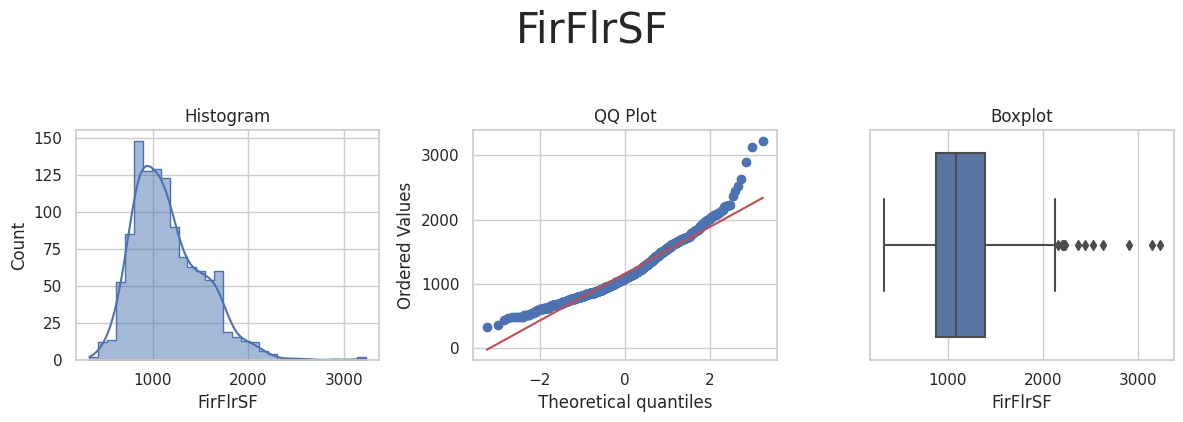

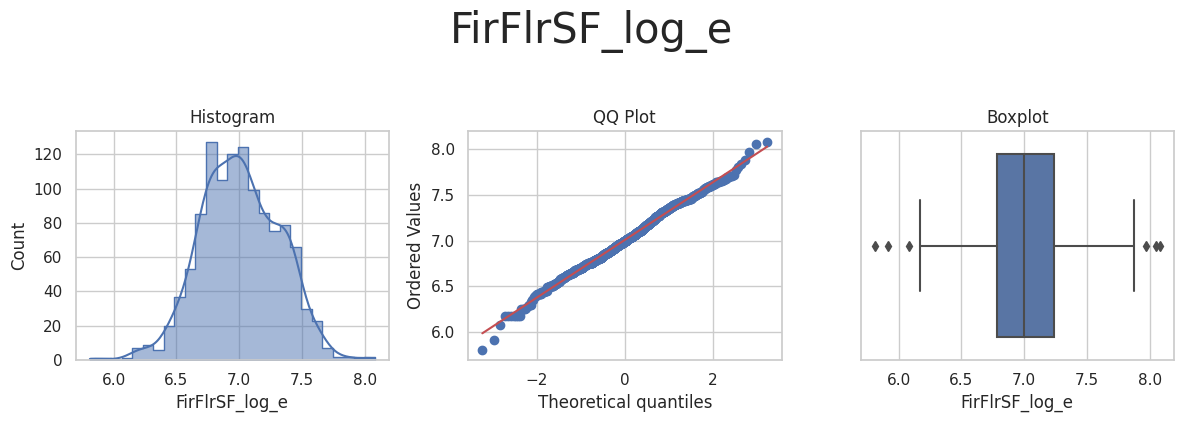

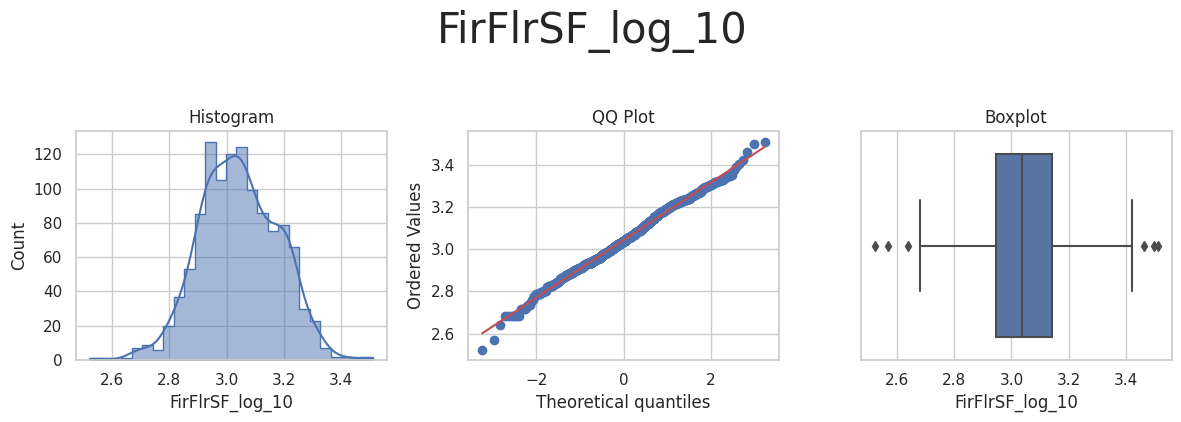

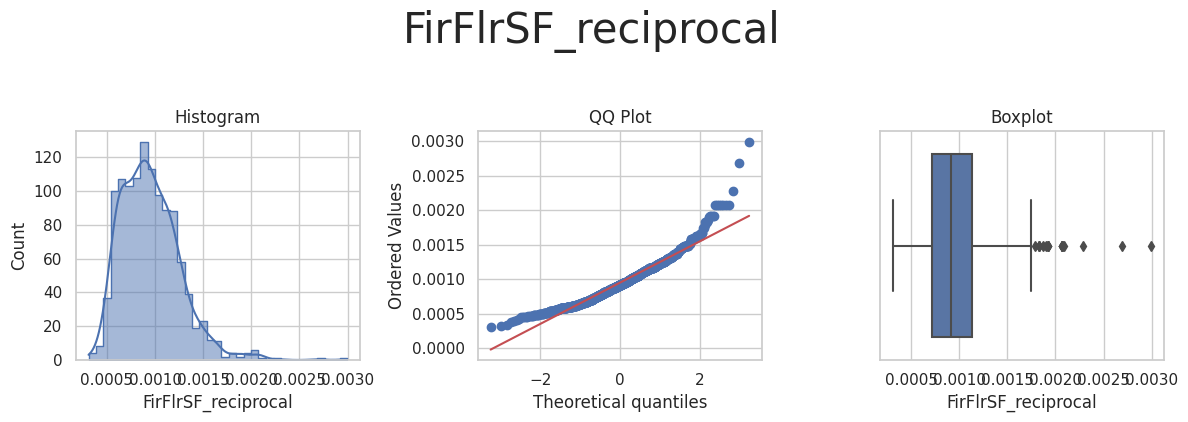

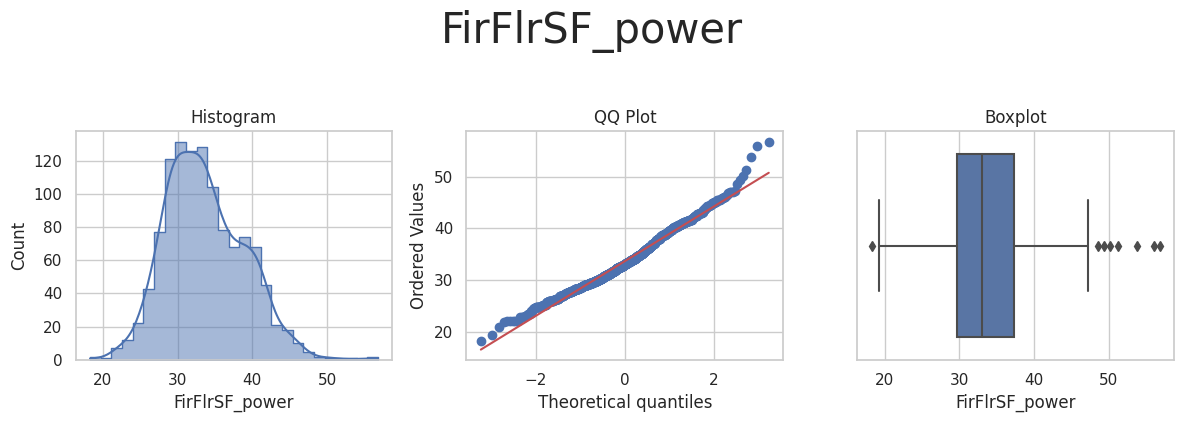

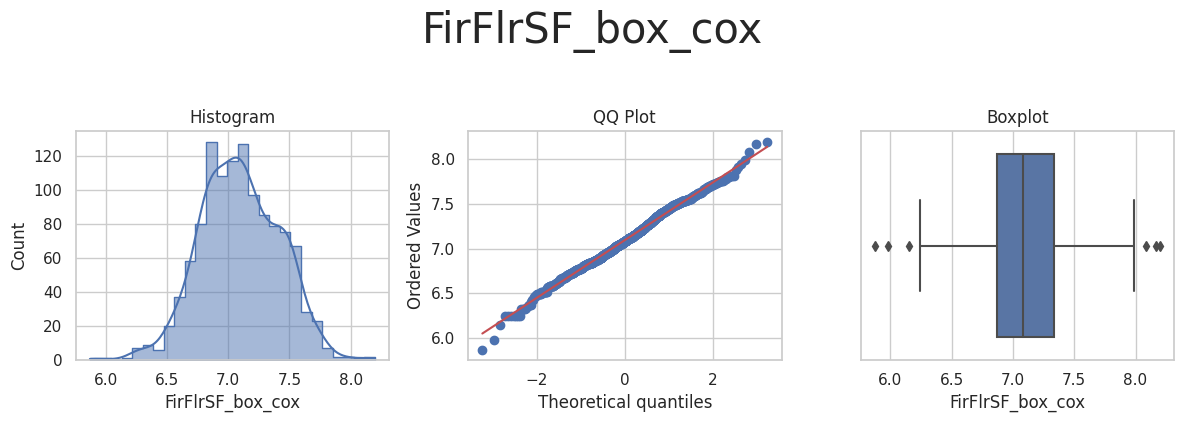

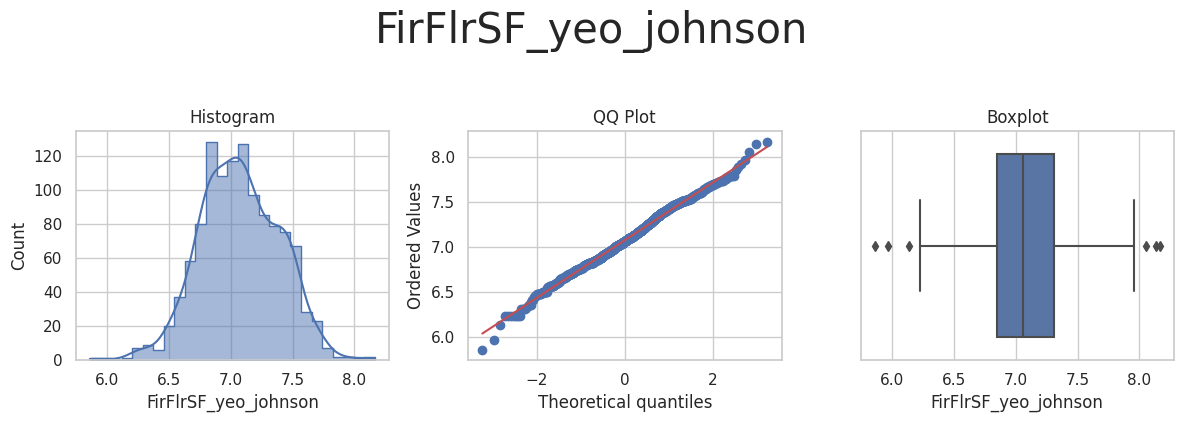



* Variable Analyzed: GarageArea
* Applied transformation: ['GarageArea_power', 'GarageArea_yeo_johnson']
* Skewness: 0.17 | Kurtosis: 0.83



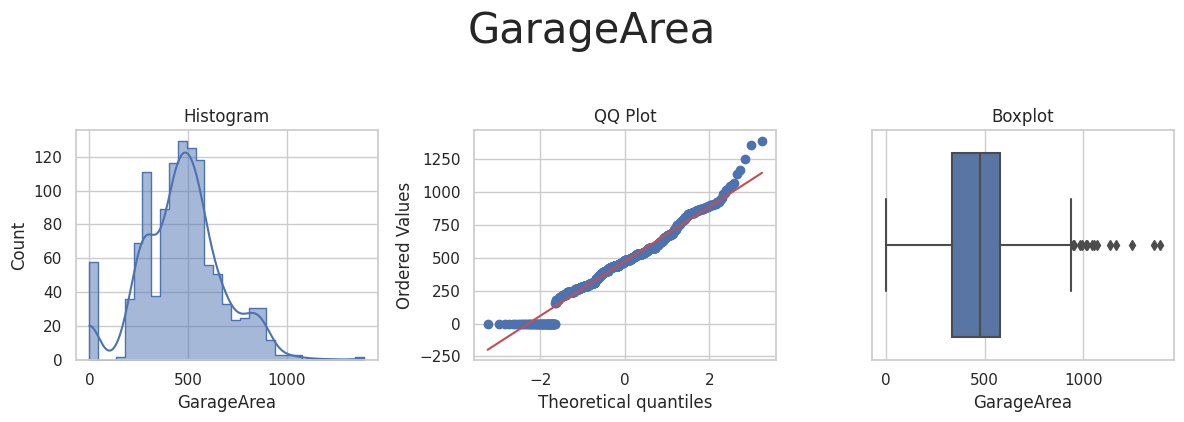

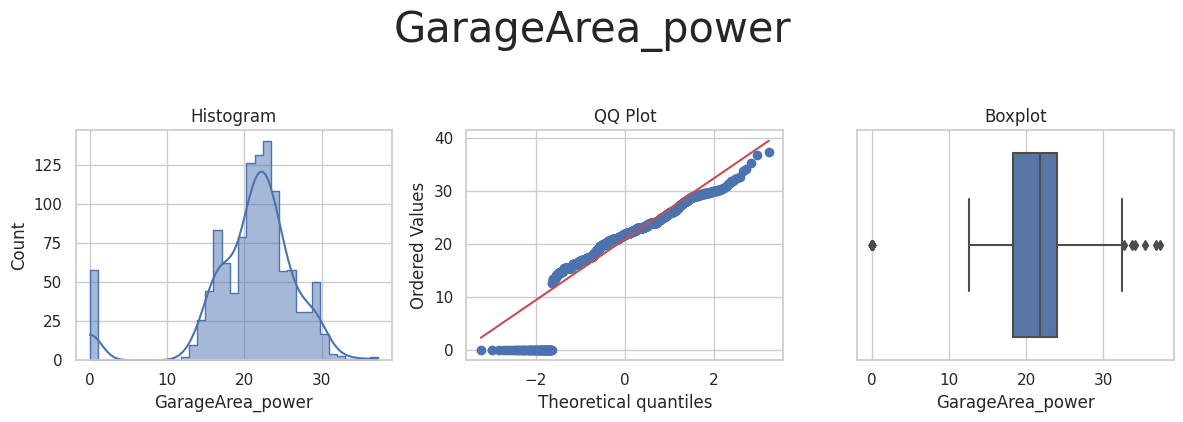

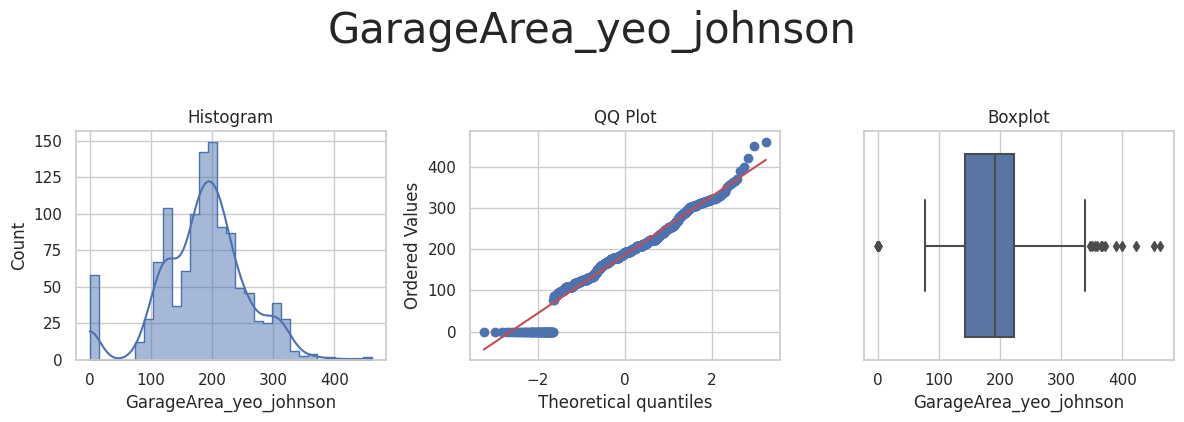



* Variable Analyzed: GarageYrBlt
* Applied transformation: ['GarageYrBlt_power', 'GarageYrBlt_yeo_johnson']
* Skewness: -4.15 | Kurtosis: 15.24



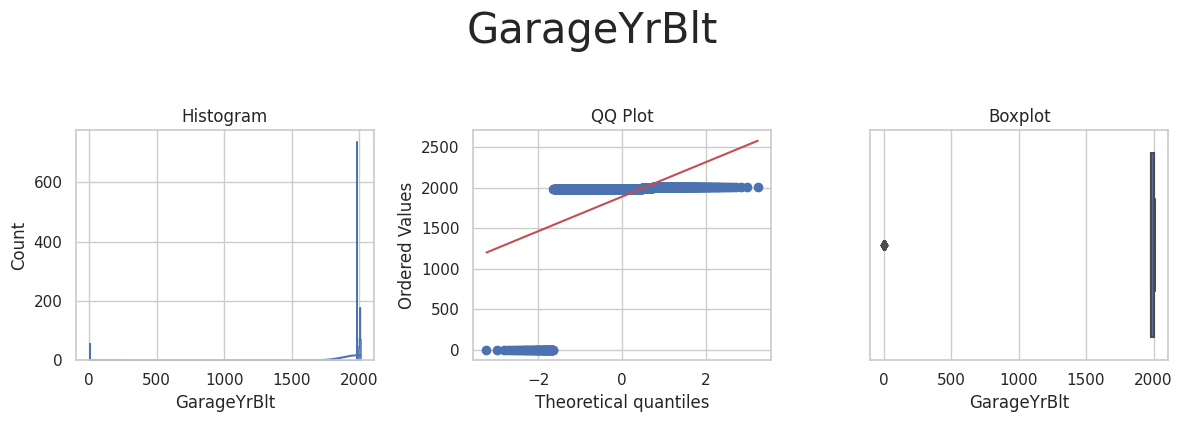

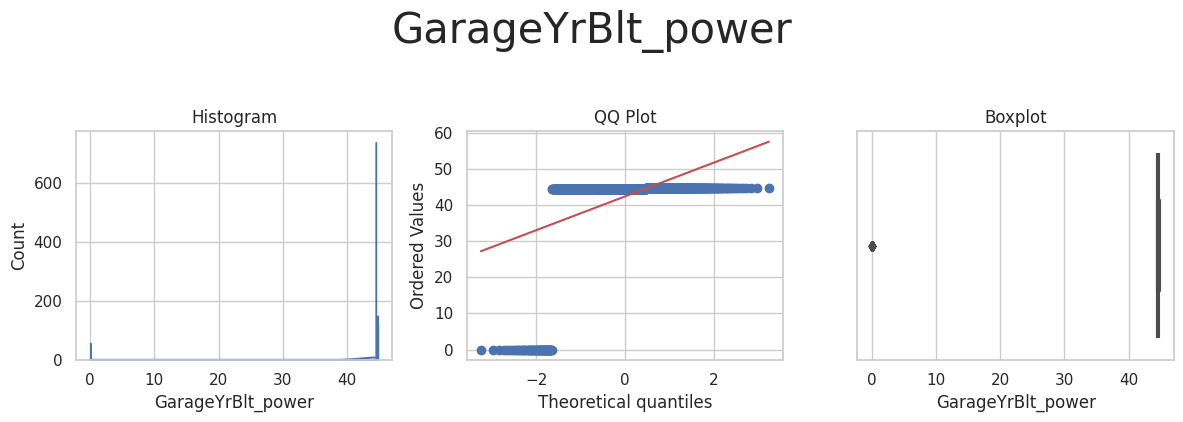

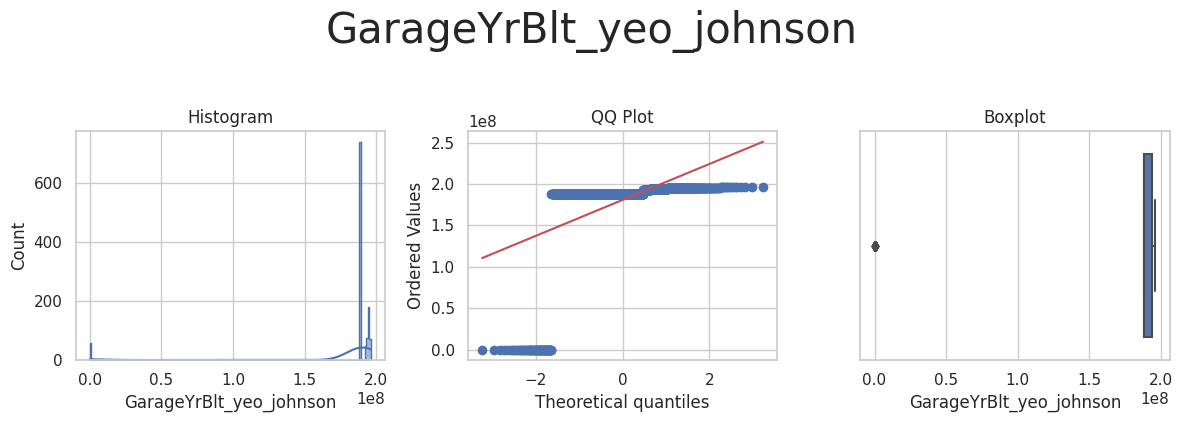



* Variable Analyzed: GrLivArea
* Applied transformation: ['GrLivArea_log_e', 'GrLivArea_log_10', 'GrLivArea_reciprocal', 'GrLivArea_power', 'GrLivArea_box_cox', 'GrLivArea_yeo_johnson']
* Skewness: 1.08 | Kurtosis: 2.54



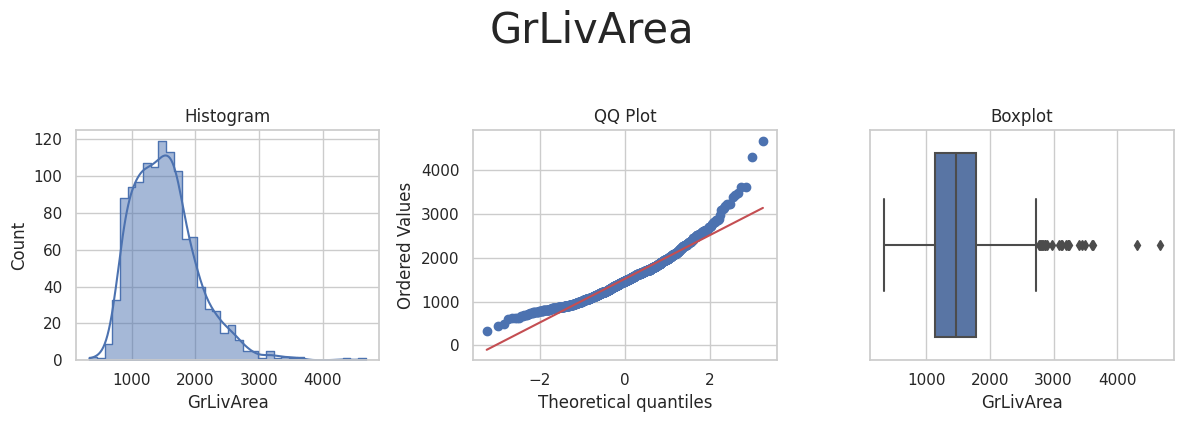

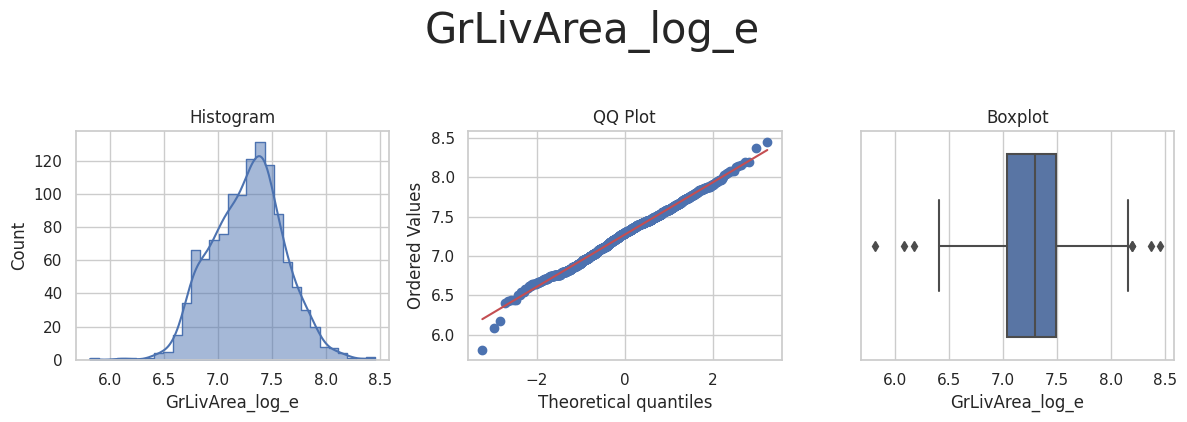

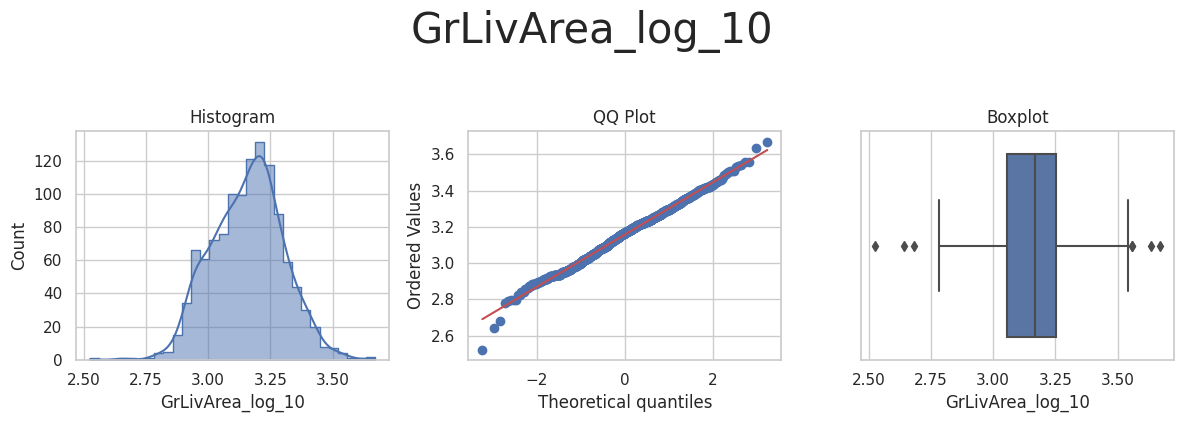

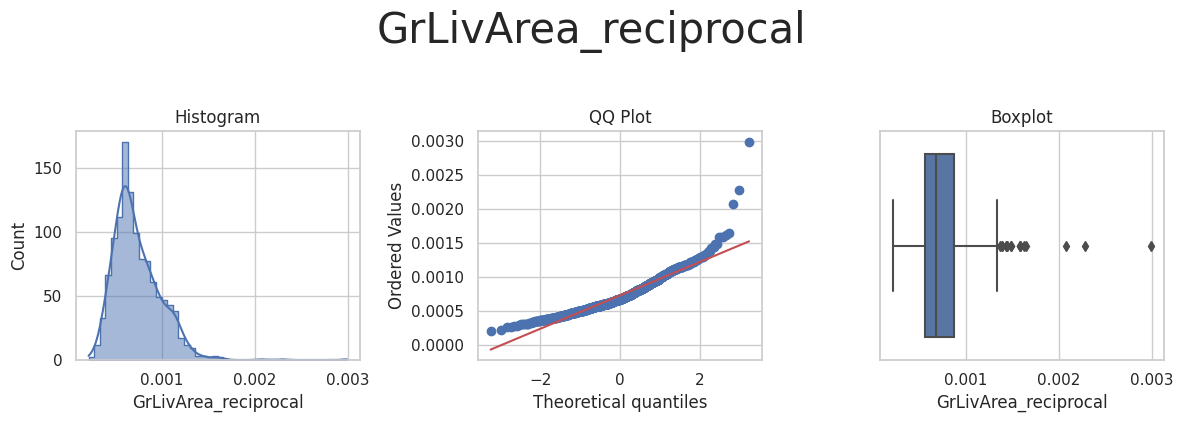

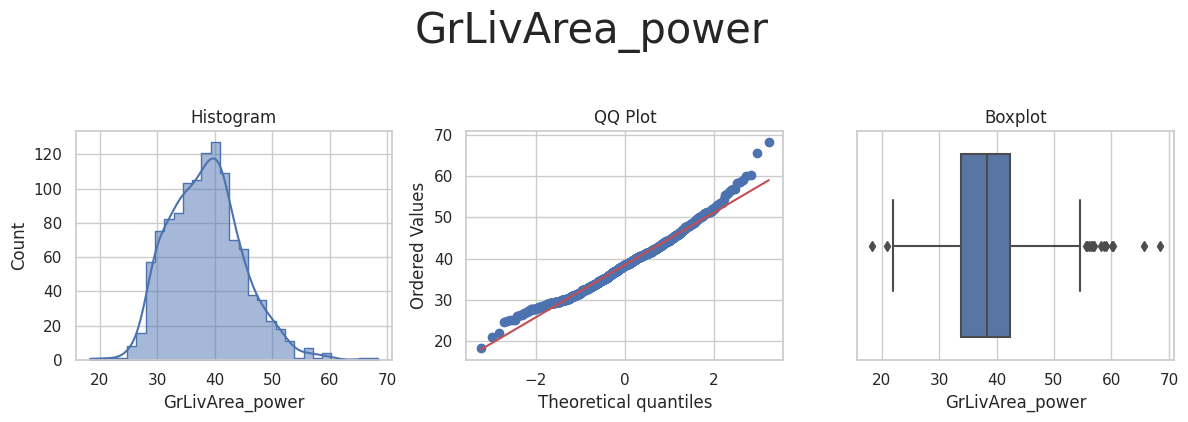

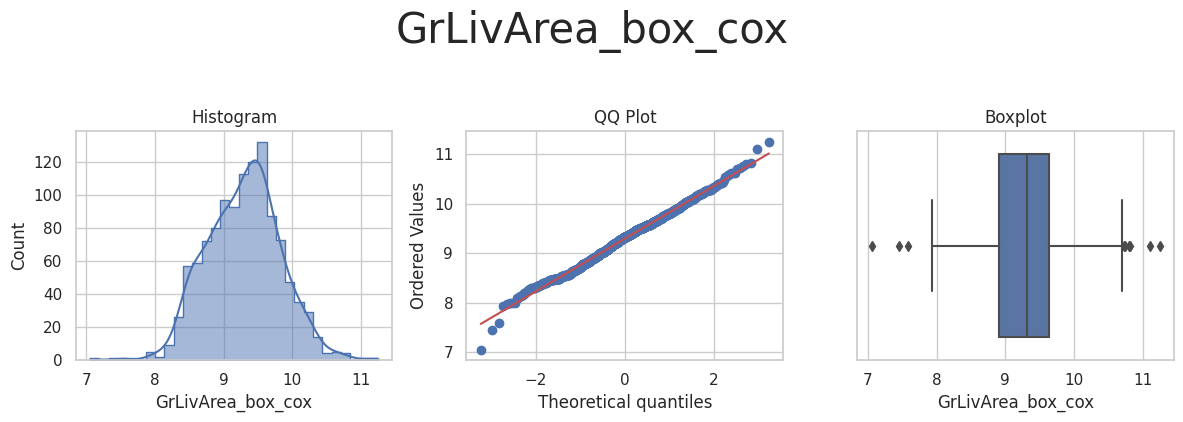

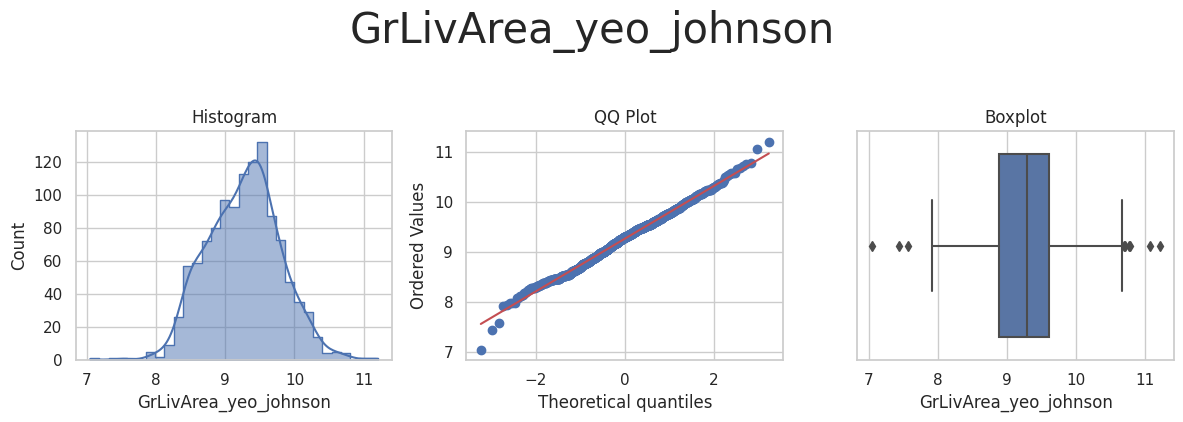



* Variable Analyzed: KitchenQual
* Applied transformation: ['KitchenQual_log_e', 'KitchenQual_log_10', 'KitchenQual_reciprocal', 'KitchenQual_power', 'KitchenQual_box_cox', 'KitchenQual_yeo_johnson']
* Skewness: 0.4 | Kurtosis: -0.22



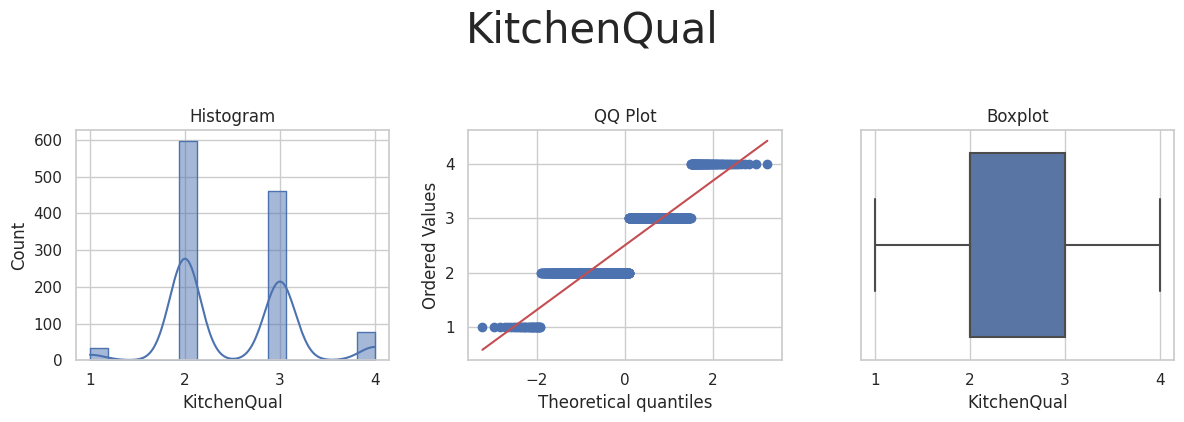

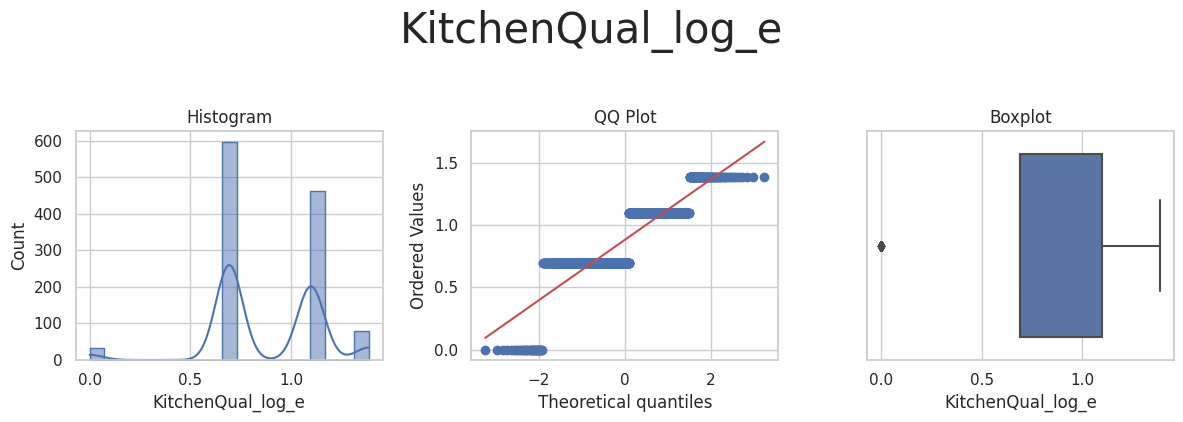

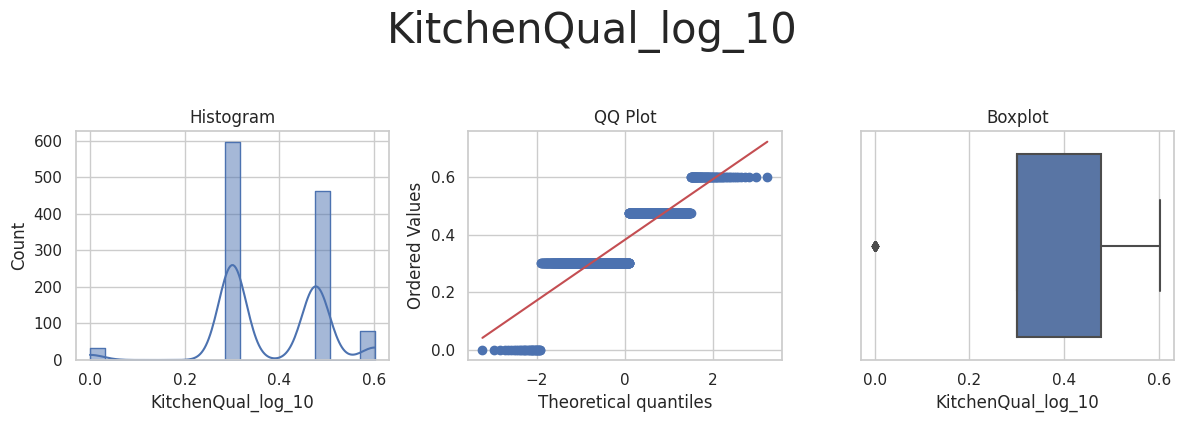

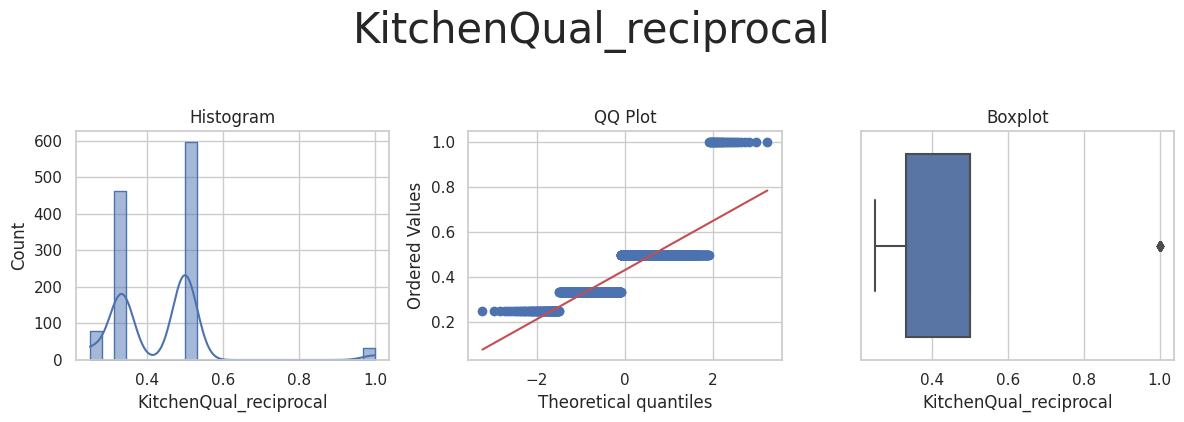

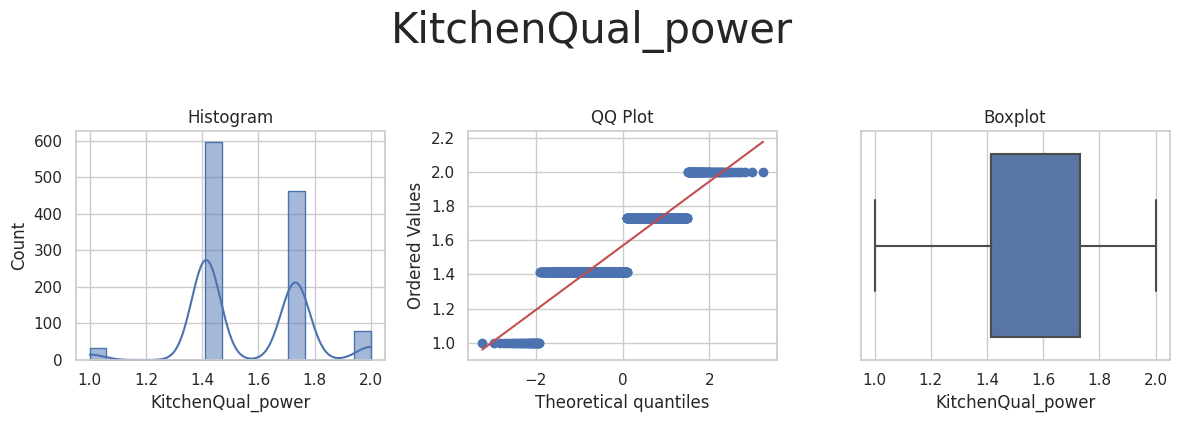

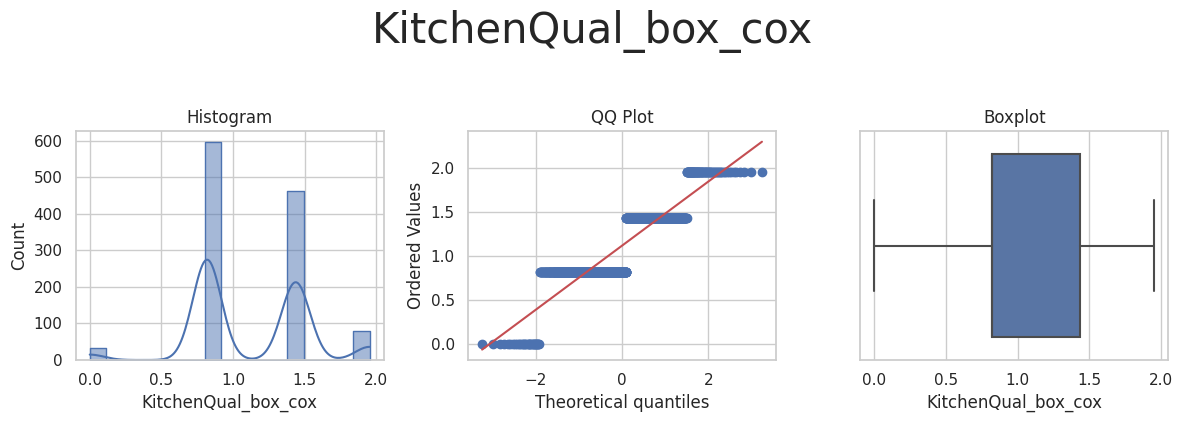

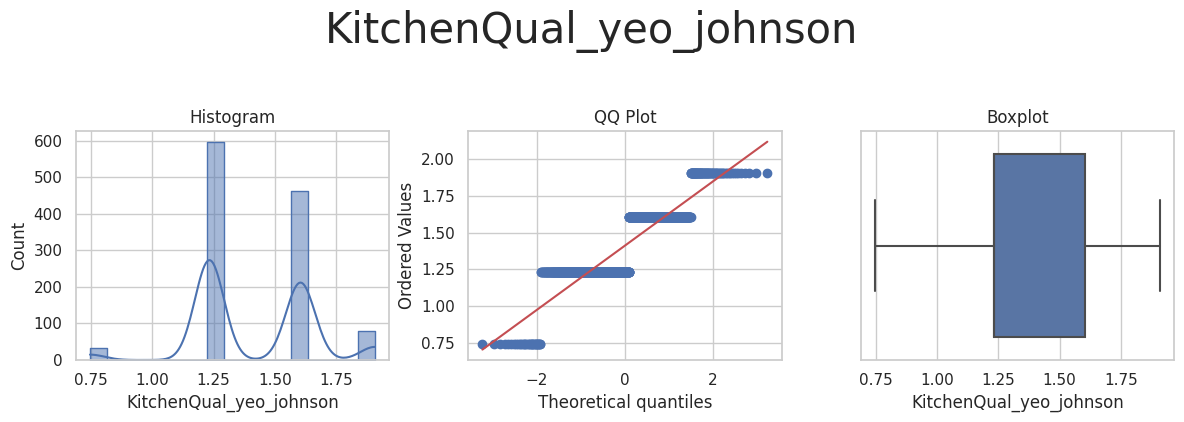



* Variable Analyzed: OverallQual
* Applied transformation: ['OverallQual_log_e', 'OverallQual_log_10', 'OverallQual_reciprocal', 'OverallQual_power', 'OverallQual_box_cox', 'OverallQual_yeo_johnson']
* Skewness: 0.17 | Kurtosis: 0.15



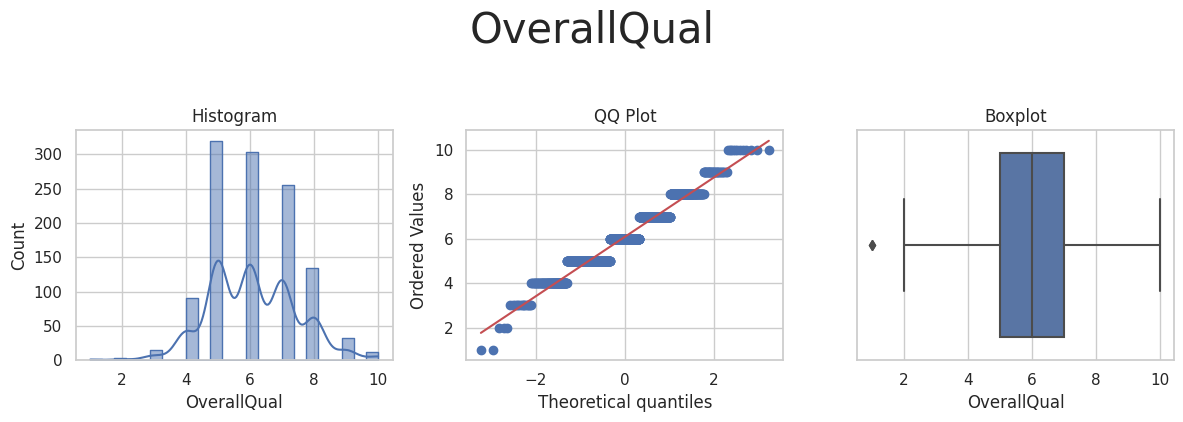

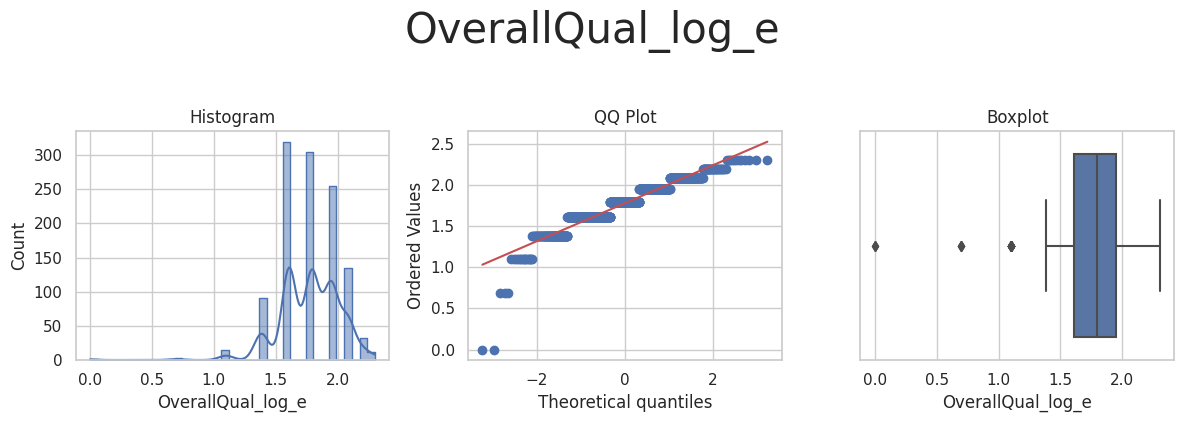

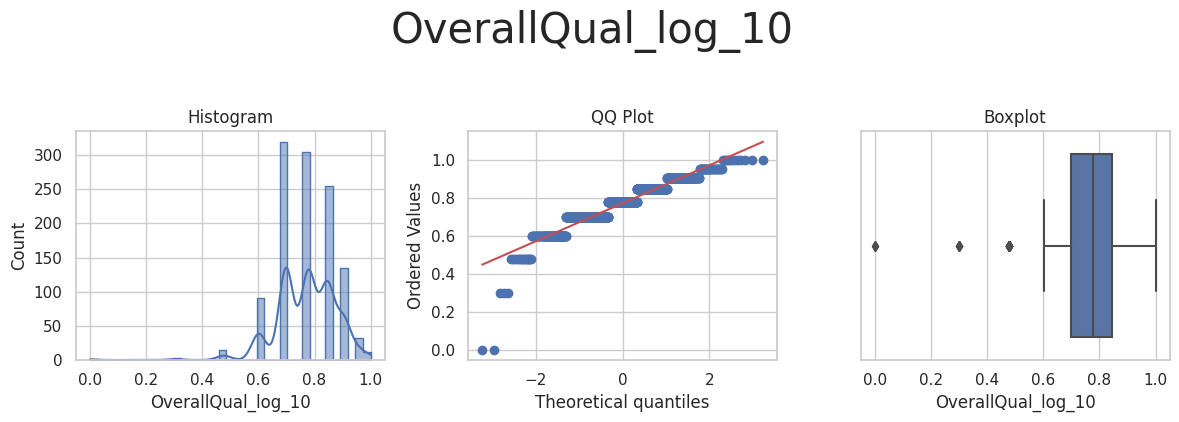

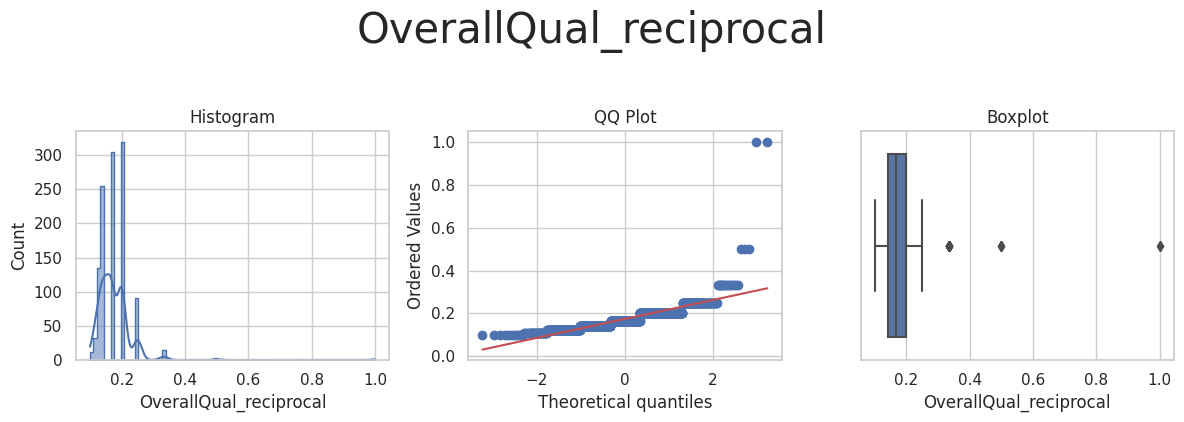

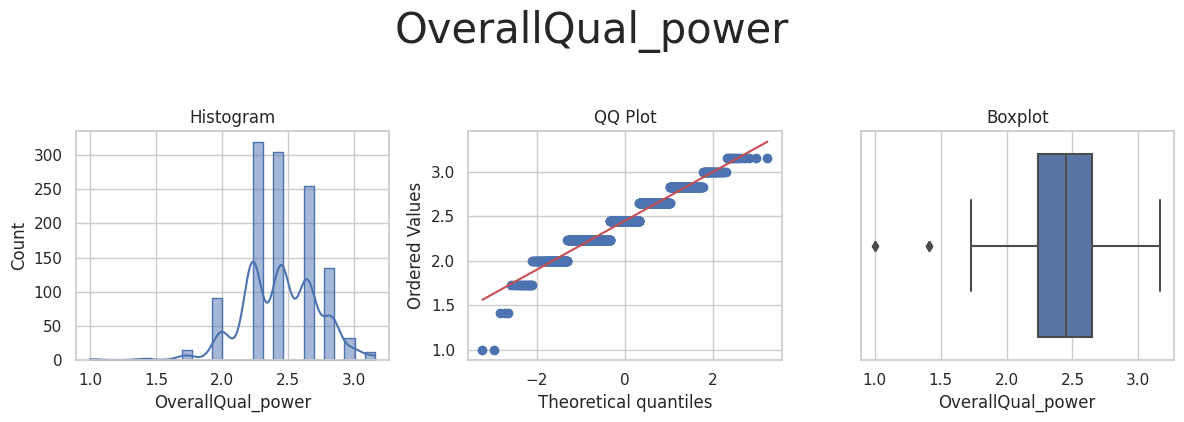

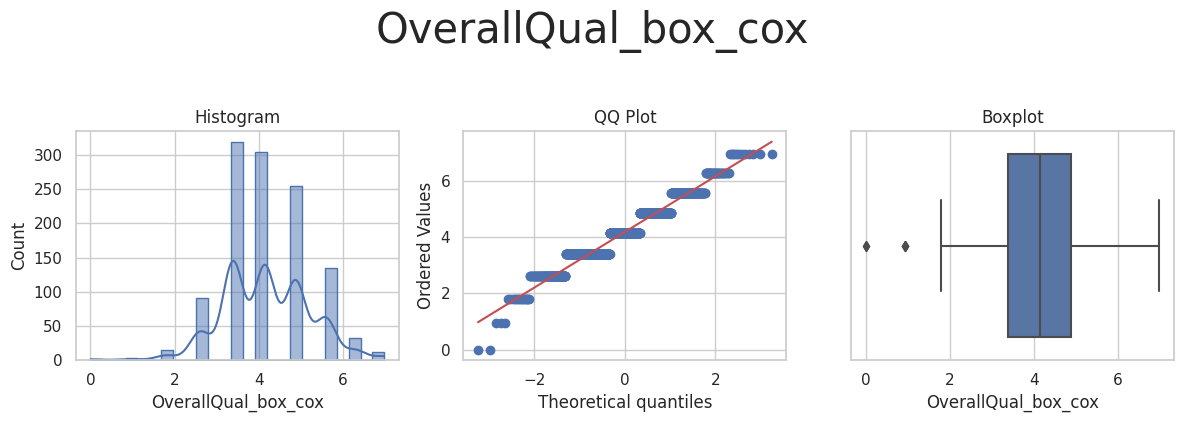

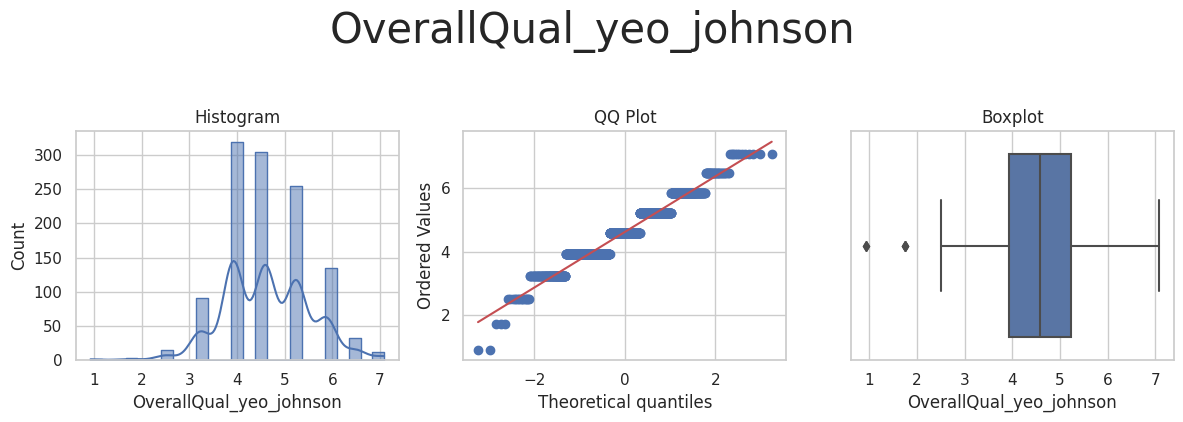



* Variable Analyzed: TotalBsmtSF
* Applied transformation: ['TotalBsmtSF_power', 'TotalBsmtSF_yeo_johnson']
* Skewness: 0.59 | Kurtosis: 2.17



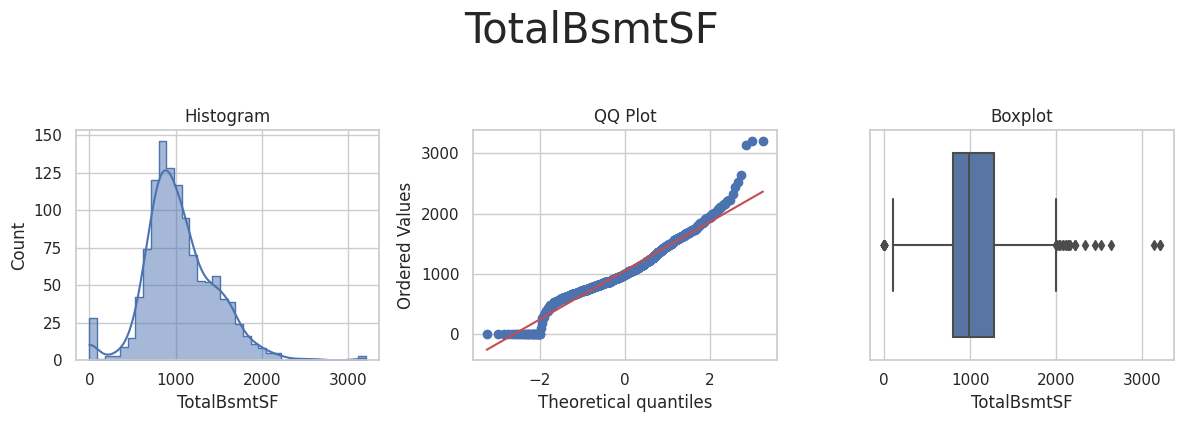

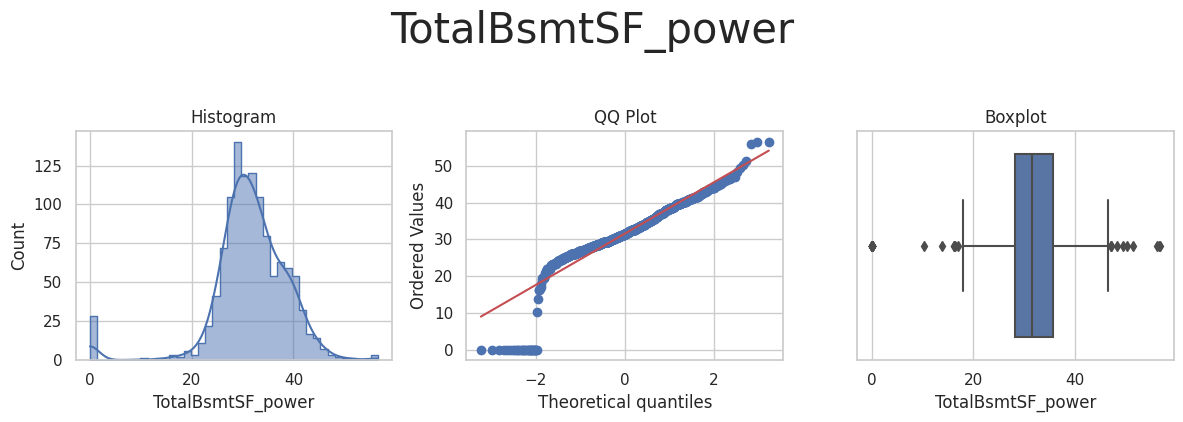

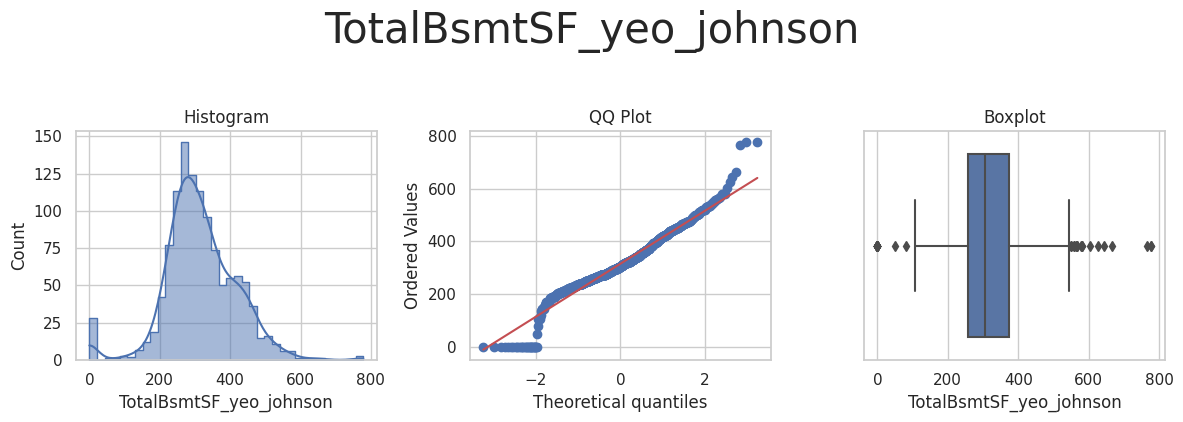



* Variable Analyzed: YearBuilt
* Applied transformation: ['YearBuilt_log_e', 'YearBuilt_log_10', 'YearBuilt_reciprocal', 'YearBuilt_power', 'YearBuilt_box_cox', 'YearBuilt_yeo_johnson']
* Skewness: -0.61 | Kurtosis: -0.43



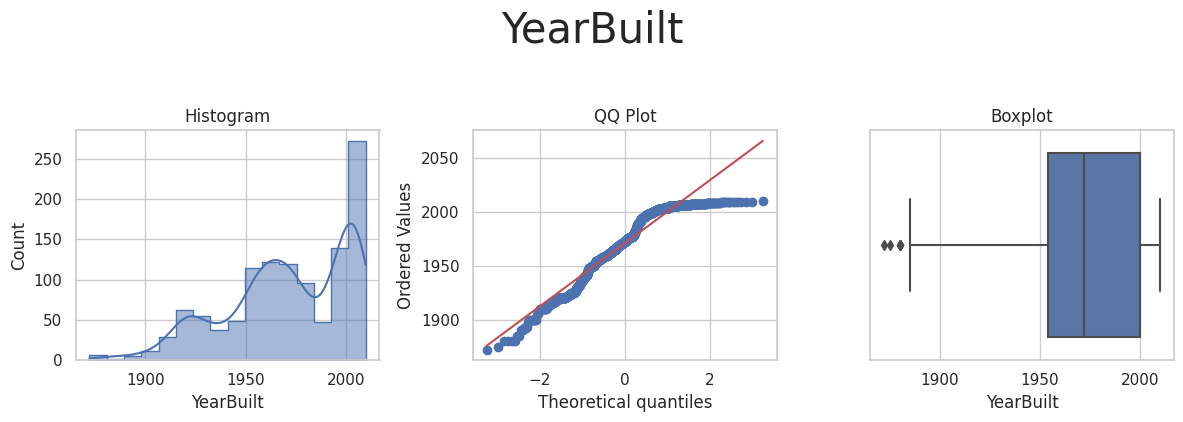

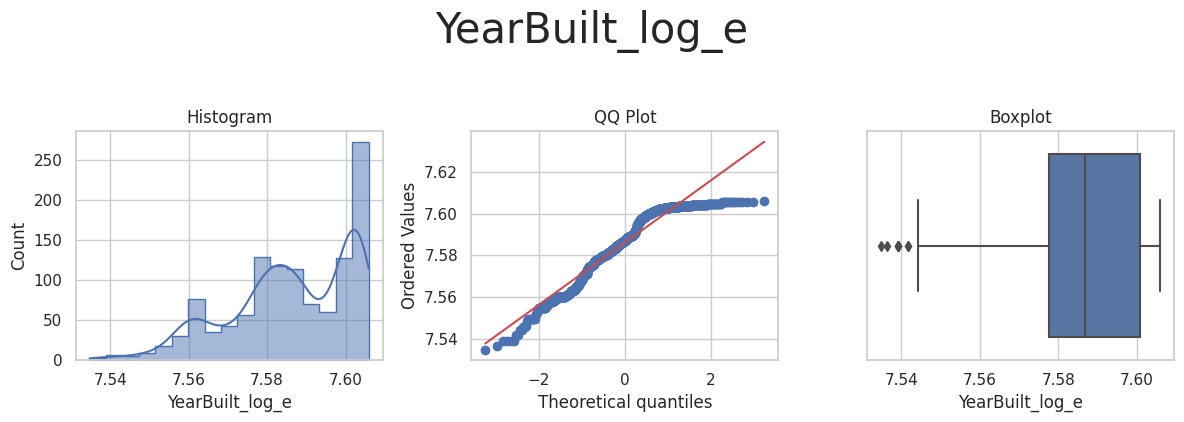

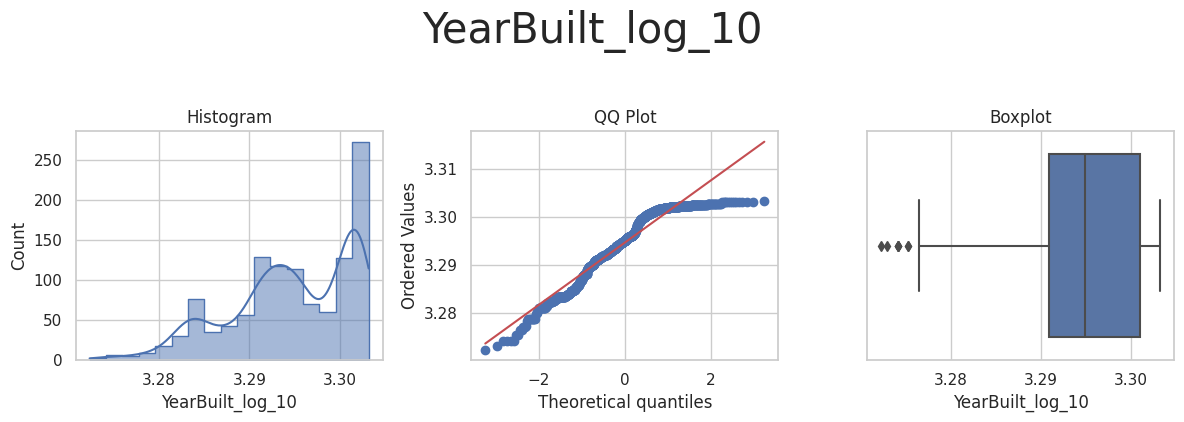

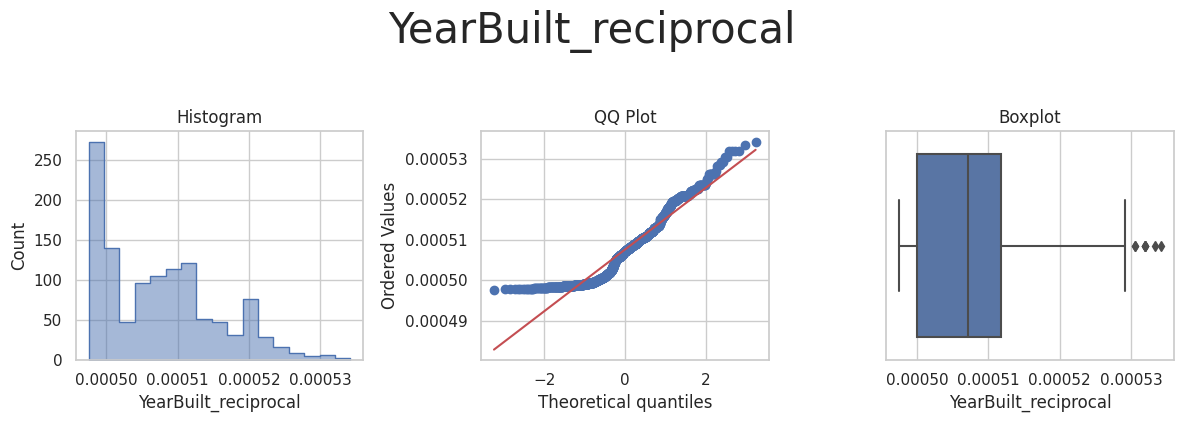

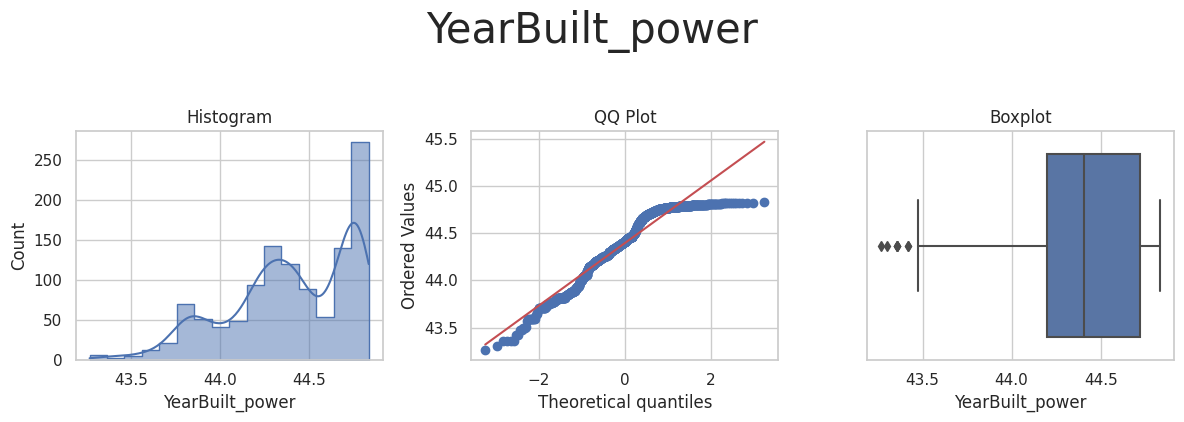

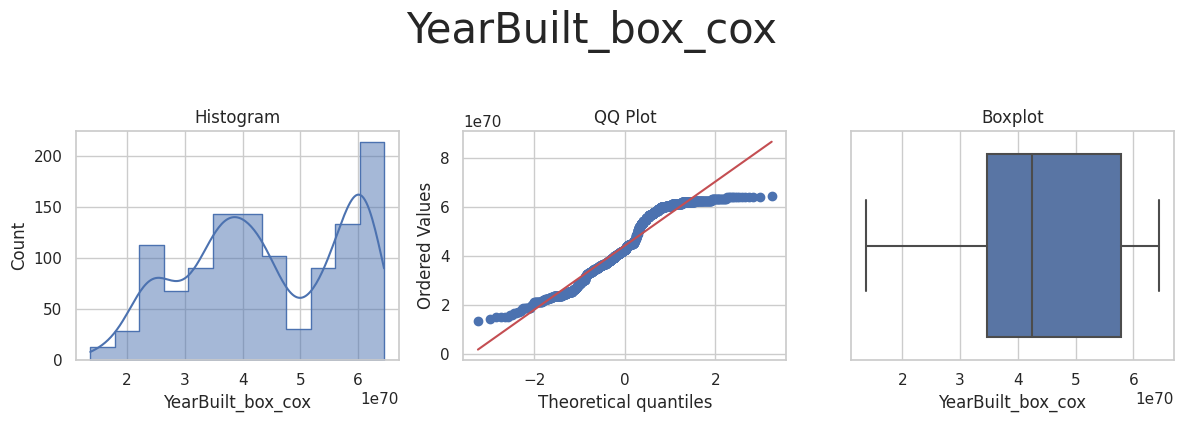

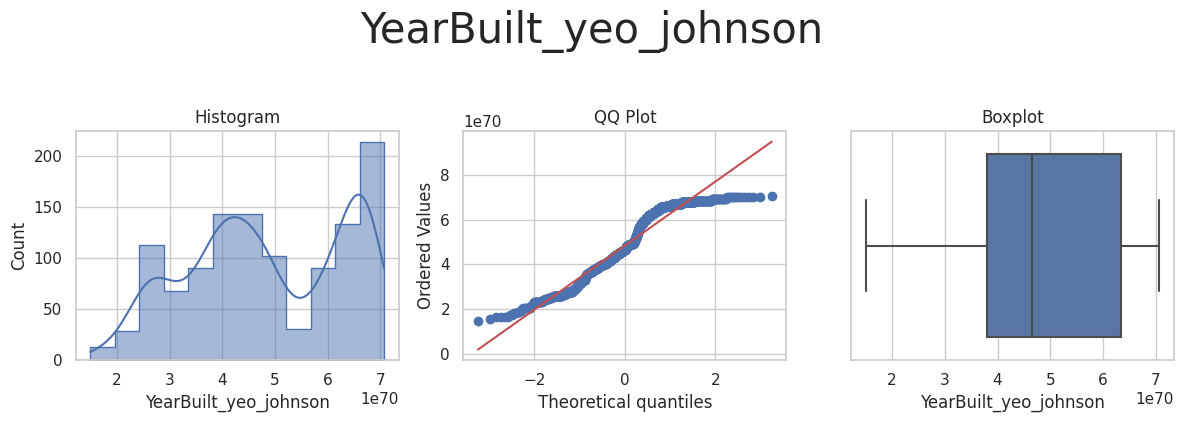



* Variable Analyzed: SalePrice
* Applied transformation: ['SalePrice_log_e', 'SalePrice_log_10', 'SalePrice_reciprocal', 'SalePrice_power', 'SalePrice_box_cox', 'SalePrice_yeo_johnson']
* Skewness: 1.75 | Kurtosis: 5.69



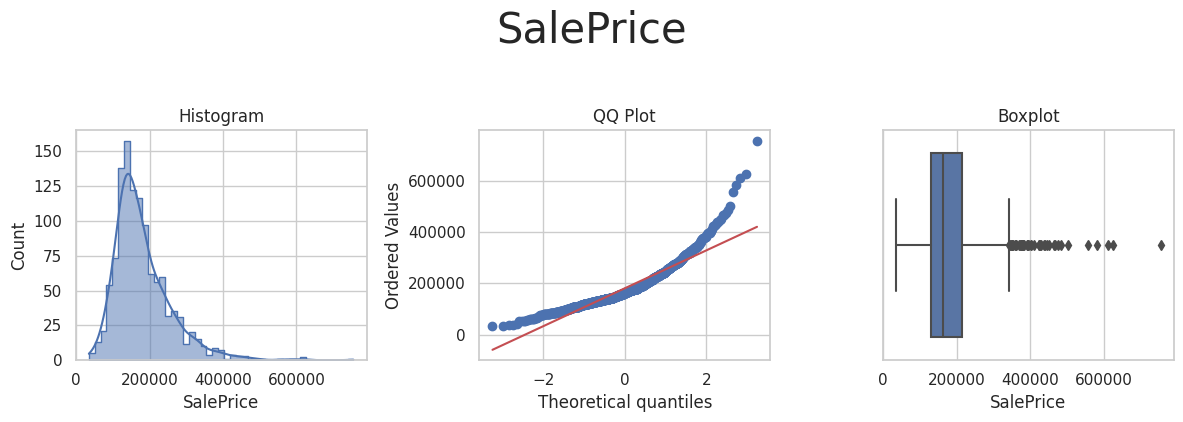

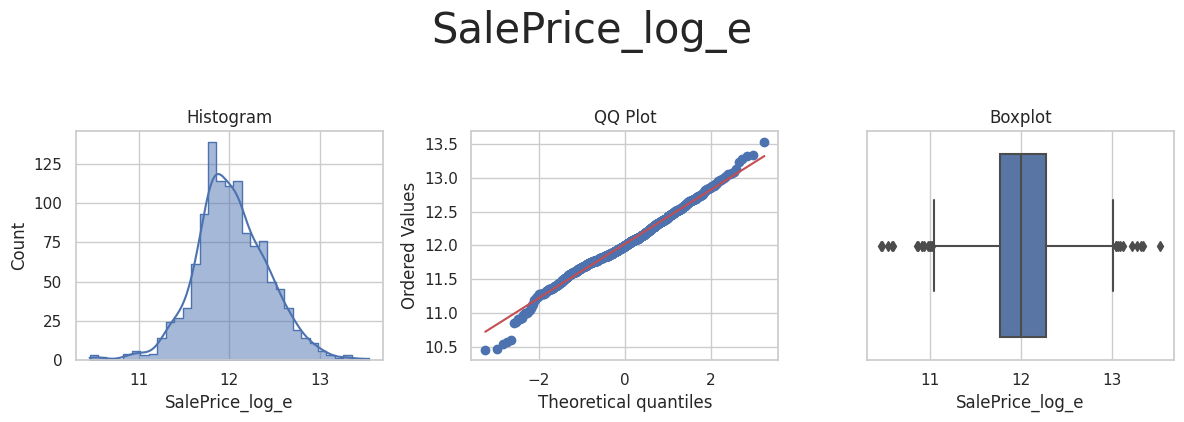

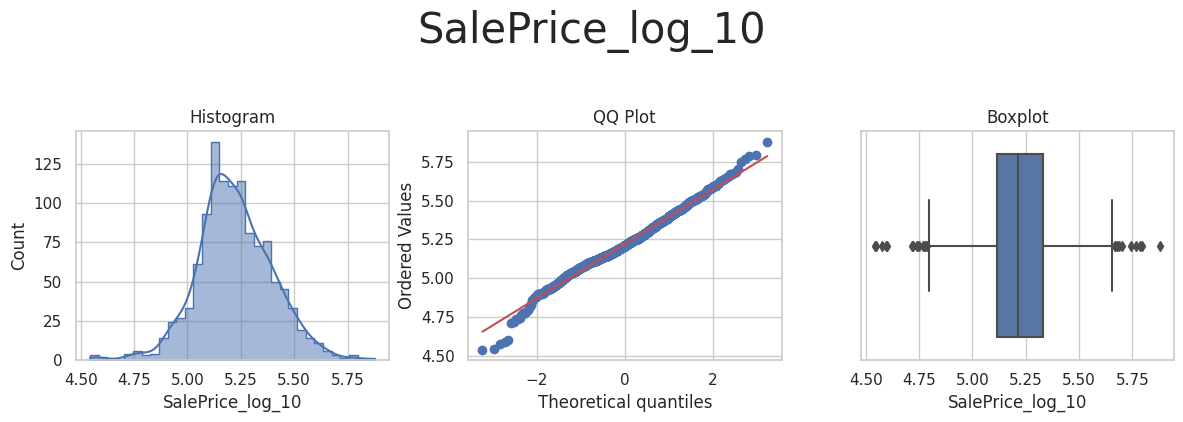

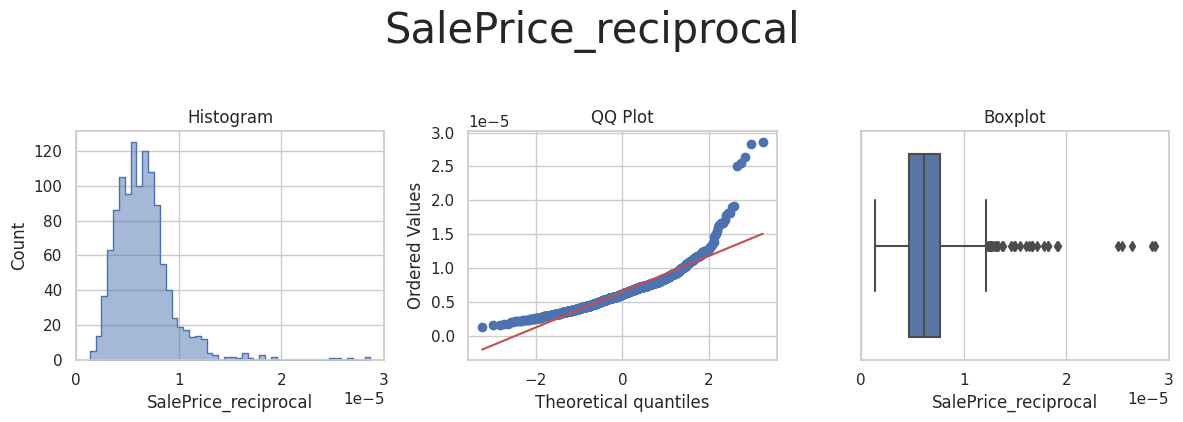

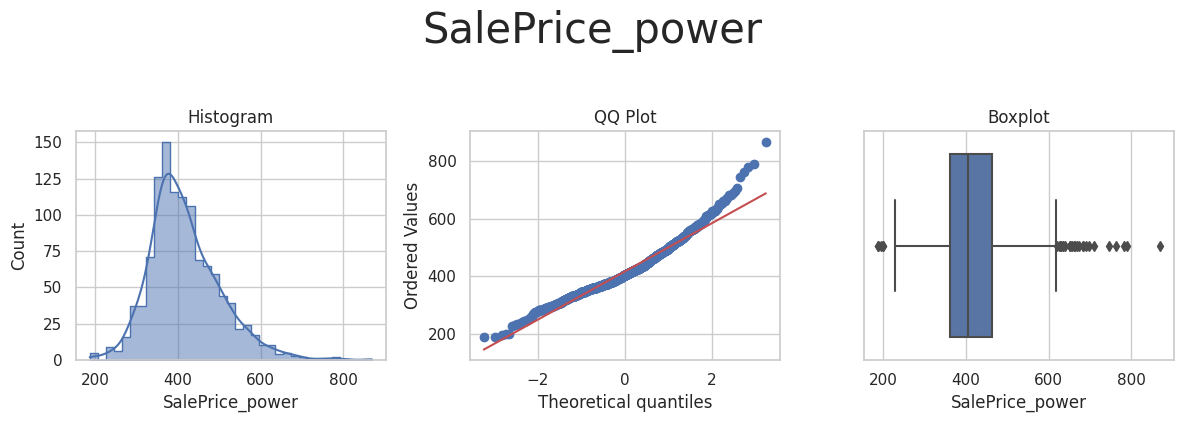

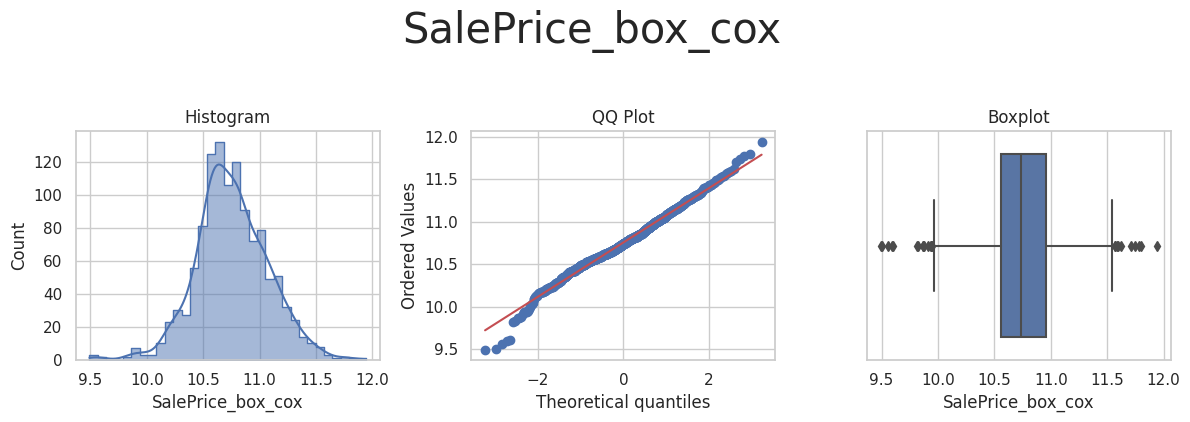

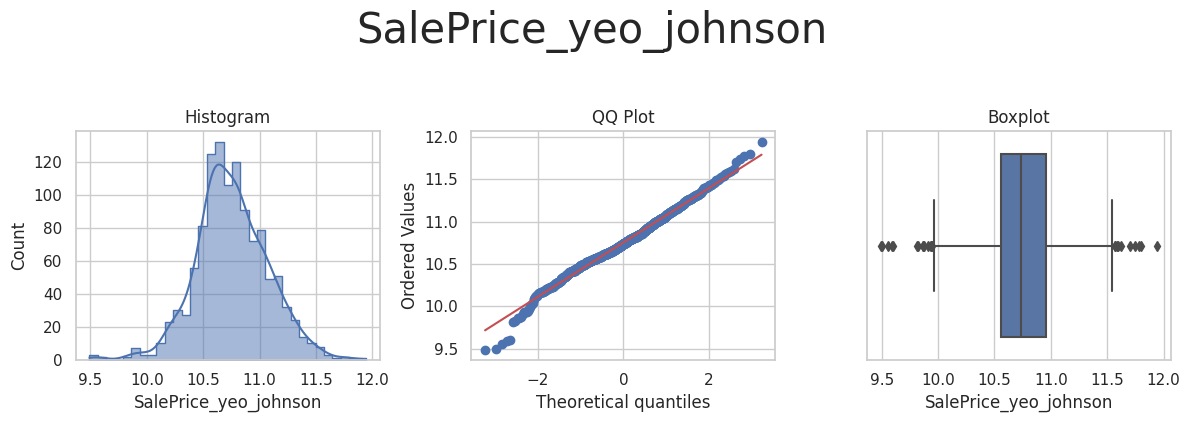

In [23]:
df_engineering = FeatureEngineeringAnalysis(df=df_engineering, analysis_type='numerical')

---

# Compare Transformations

In [24]:
df_engineering = TrainSet.copy()
df_engineering.head()

FirFlrSF  GarageArea  GarageYrBlt  GrLivArea  KitchenQual  OverallQual  \
0      1828         774         2007       1828            3            9   
1       894         308         1979        894            2            5   
2       964         432         1979        964            2            5   
3      1689         857         2002       1689            3            8   
4      1541         843         2001       1541            3            7   

   TotalBsmtSF  YearBuilt  SalePrice  
0         1822       2007     314813  
1          894       1962     109500  
2          876       1921     163500  
3         1568       2002     271000  
4         1541       2001     205000

In [25]:
df_all_transfomers = df_engineering.drop(columns=['GarageArea', 'GarageYrBlt', 'TotalBsmtSF'])

### Log Transformer

In [26]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
      ( 'log', vt.LogTransformer() )
  ])

df_transformed = pipeline.fit_transform(df_all_transfomers)

In [27]:
def calculate_skew_kurtosis(df,col, moment):
  print(f"{moment}  | skewness: {df[col].skew().round(2)} | kurtosis: {df[col].kurtosis().round(2)}")
  

def compare_distributions_before_and_after_applying_transformer(df, df_transformed, method):

  for col in df.columns:
    print(f"*** {col} ***")
    print(f"*** {method} ***")
    calculate_skew_kurtosis(df,col, moment='before transformation')
    calculate_skew_kurtosis(df_transformed,col, moment='after transformation')
    print("\n")


compare_distributions_before_and_after_applying_transformer(df_all_transfomers, df_transformed, method='Log Transformer')

*** FirFlrSF ***
*** Log Transformer ***
before transformation  | skewness: 0.96 | kurtosis: 1.69
after transformation  | skewness: -0.0 | kurtosis: 0.01


*** GrLivArea ***
*** Log Transformer ***
before transformation  | skewness: 1.08 | kurtosis: 2.54
after transformation  | skewness: -0.07 | kurtosis: 0.17


*** KitchenQual ***
*** Log Transformer ***
before transformation  | skewness: 0.4 | kurtosis: -0.22
after transformation  | skewness: -0.46 | kurtosis: 0.98


*** OverallQual ***
*** Log Transformer ***
before transformation  | skewness: 0.17 | kurtosis: 0.15
after transformation  | skewness: -1.09 | kurtosis: 5.31


*** YearBuilt ***
*** Log Transformer ***
before transformation  | skewness: -0.61 | kurtosis: -0.43
after transformation  | skewness: -0.64 | kurtosis: -0.37


*** SalePrice ***
*** Log Transformer ***
before transformation  | skewness: 1.75 | kurtosis: 5.69
after transformation  | skewness: 0.03 | kurtosis: 0.84




### Power

In [28]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
      ( 'power', vt.PowerTransformer() )
  ])

df_transformed = pipeline.fit_transform(df_engineering)
compare_distributions_before_and_after_applying_transformer(df_engineering, df_transformed, method='Power')

*** FirFlrSF ***
*** Power ***
before transformation  | skewness: 0.96 | kurtosis: 1.69
after transformation  | skewness: 0.46 | kurtosis: 0.3


*** GarageArea ***
*** Power ***
before transformation  | skewness: 0.17 | kurtosis: 0.83
after transformation  | skewness: -1.61 | kurtosis: 4.01


*** GarageYrBlt ***
*** Power ***
before transformation  | skewness: -4.15 | kurtosis: 15.24
after transformation  | skewness: -4.15 | kurtosis: 15.25


*** GrLivArea ***
*** Power ***
before transformation  | skewness: 1.08 | kurtosis: 2.54
after transformation  | skewness: 0.47 | kurtosis: 0.6


*** KitchenQual ***
*** Power ***
before transformation  | skewness: 0.4 | kurtosis: -0.22
after transformation  | skewness: 0.03 | kurtosis: -0.03


*** OverallQual ***
*** Power ***
before transformation  | skewness: 0.17 | kurtosis: 0.15
after transformation  | skewness: -0.3 | kurtosis: 1.04


*** TotalBsmtSF ***
*** Power ***
before transformation  | skewness: 0.59 | kurtosis: 2.17
after transformat

### Box-Cox

In [29]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
      ( 'bct', vt.BoxCoxTransformer() )
  ])

df_transformed = pipeline.fit_transform(df_all_transfomers)
compare_distributions_before_and_after_applying_transformer(df_all_transfomers, df_transformed, method='Box-Cox')

*** FirFlrSF ***
*** Box-Cox ***
before transformation  | skewness: 0.96 | kurtosis: 1.69
after transformation  | skewness: 0.0 | kurtosis: 0.01


*** GrLivArea ***
*** Box-Cox ***
before transformation  | skewness: 1.08 | kurtosis: 2.54
after transformation  | skewness: 0.0 | kurtosis: 0.15


*** KitchenQual ***
*** Box-Cox ***
before transformation  | skewness: 0.4 | kurtosis: -0.22
after transformation  | skewness: 0.01 | kurtosis: 0.01


*** OverallQual ***
*** Box-Cox ***
before transformation  | skewness: 0.17 | kurtosis: 0.15
after transformation  | skewness: 0.03 | kurtosis: 0.28


*** YearBuilt ***
*** Box-Cox ***
before transformation  | skewness: -0.61 | kurtosis: -0.43
after transformation  | skewness: -0.13 | kurtosis: -1.19


*** SalePrice ***
*** Box-Cox ***
before transformation  | skewness: 1.75 | kurtosis: 5.69
after transformation  | skewness: -0.0 | kurtosis: 0.86




### Yeo-Johnson

In [30]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
      ( 'yj', vt.YeoJohnsonTransformer() )
  ])

df_transformed = pipeline.fit_transform(df_engineering)
compare_distributions_before_and_after_applying_transformer(df_engineering, df_transformed, method='Yeo-Johnson')

*** FirFlrSF ***
*** Yeo-Johnson ***
before transformation  | skewness: 0.96 | kurtosis: 1.69
after transformation  | skewness: 0.0 | kurtosis: 0.01


*** GarageArea ***
*** Yeo-Johnson ***
before transformation  | skewness: 0.17 | kurtosis: 0.83
after transformation  | skewness: -0.29 | kurtosis: 1.01


*** GarageYrBlt ***
*** Yeo-Johnson ***
before transformation  | skewness: -4.15 | kurtosis: 15.24
after transformation  | skewness: -4.12 | kurtosis: 15.08


*** GrLivArea ***
*** Yeo-Johnson ***
before transformation  | skewness: 1.08 | kurtosis: 2.54
after transformation  | skewness: 0.0 | kurtosis: 0.15


*** KitchenQual ***
*** Yeo-Johnson ***
before transformation  | skewness: 0.4 | kurtosis: -0.22
after transformation  | skewness: -0.0 | kurtosis: -0.03


*** OverallQual ***
*** Yeo-Johnson ***
before transformation  | skewness: 0.17 | kurtosis: 0.15
after transformation  | skewness: 0.02 | kurtosis: 0.28


*** TotalBsmtSF ***
*** Yeo-Johnson ***
before transformation  | skewnes

There are some variable where more than one transformation can be used but I will use the following numerical transformations:

**Variable**|**Transformer**
:-----:|:-----:
1stFlrSF|Yeo-Johnson
GarageArea|None
GarageYrBlt|Yeo-Johnson
GrLivArea|Yeo-Johnson
KitchenQual|Yeo-Johnson
OverallQual|Yeo-Johnson
TotalBsmtSF|Yeo-Johnson
YearBuilt|Log

In [31]:
log_variables = ['YearBuilt']
yj_variables = ['FirFlrSF', 'GarageYrBlt', 'GrLivArea', 'KitchenQual', 'OverallQual', 'TotalBsmtSF']

pipeline = Pipeline([
    ('log_transformer', vt.LogTransformer(variables=log_variables, base='e')),
    ('yeo_johnson_transformer', vt.YeoJohnsonTransformer(variables=yj_variables)),
])

TrainSet = pipeline.fit_transform(TrainSet)
TestSet = pipeline.transform(TestSet)

### Handling of outliers using the Windsorizer

* Select Variables that are showing outliers

In [32]:
outlier_variables = ['FirFlrSF', 'GarageArea', 'GarageYrBlt',
                    'GrLivArea', 'OverallQual', 'TotalBsmtSF',
                    'YearBuilt']
outlier_variables

['FirFlrSF',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt']

In [33]:
from feature_engine.outliers import Winsorizer

In [34]:
df_engineering = TrainSet[outlier_variables].copy()
df_engineering.head()

FirFlrSF  GarageArea   GarageYrBlt  GrLivArea  OverallQual  TotalBsmtSF  \
0  7.585316         774  1.953937e+08   9.643829     6.484417   495.850351   
1  6.857203         308  1.882884e+08   8.514203     3.922905   280.785318   
2  6.933857         432  1.882884e+08   8.630806     3.922905   276.257124   
3  7.504725         857  1.941129e+08   9.516345     5.868985   439.843394   
4  7.411301         843  1.938574e+08   9.369332     5.238591   433.785653   

   YearBuilt  
0   7.604396  
1   7.581720  
2   7.560601  
3   7.601902  
4   7.601402

* Variable Analyzed: FirFlrSF
* Applied transformation: ['FirFlrSF_iqr']
* Skewness: 0.0 | Kurtosis: 0.01



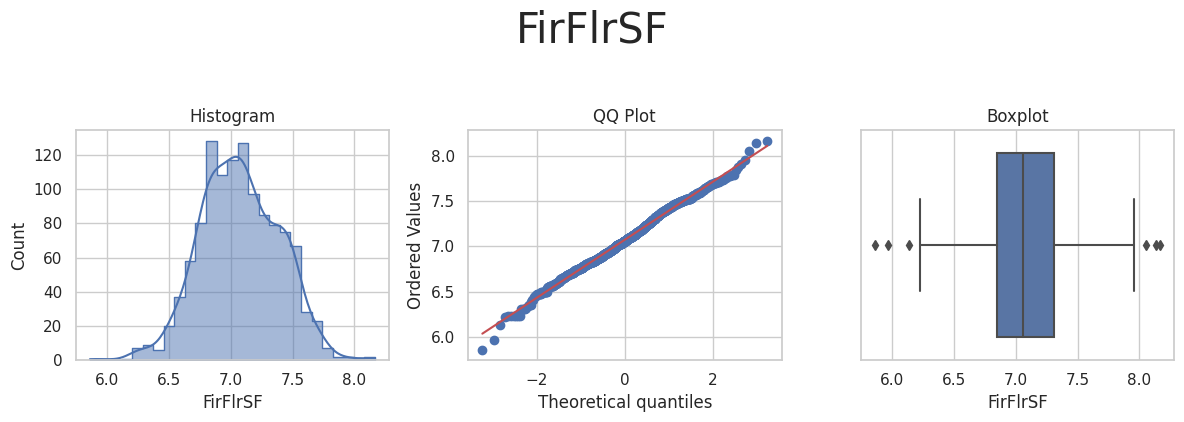

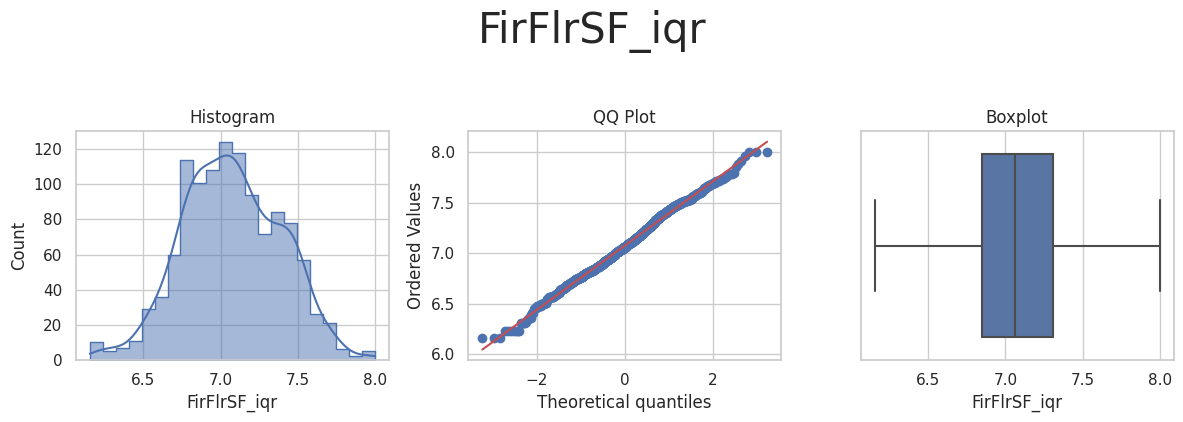



* Variable Analyzed: GarageArea
* Applied transformation: ['GarageArea_iqr']
* Skewness: 0.17 | Kurtosis: 0.83



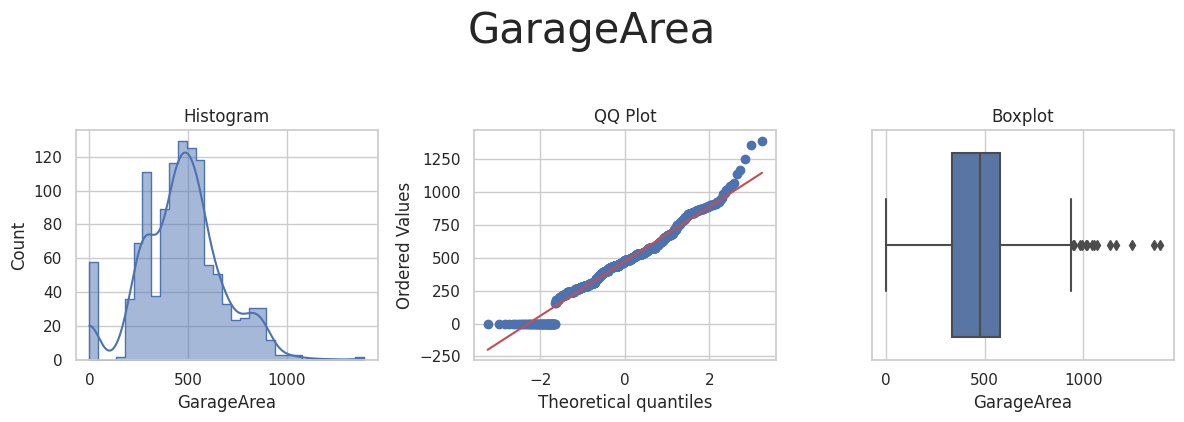

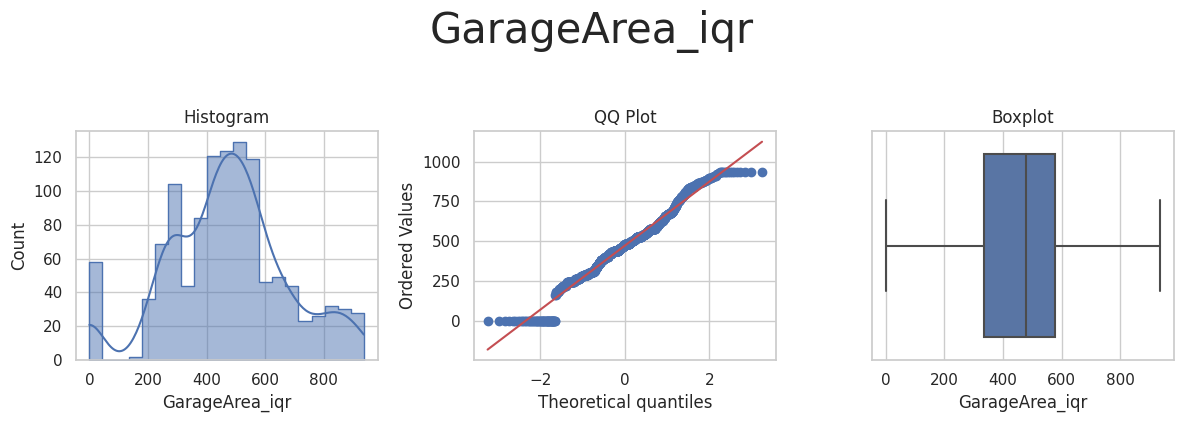



* Variable Analyzed: GarageYrBlt
* Applied transformation: ['GarageYrBlt_iqr']
* Skewness: -4.12 | Kurtosis: 15.08



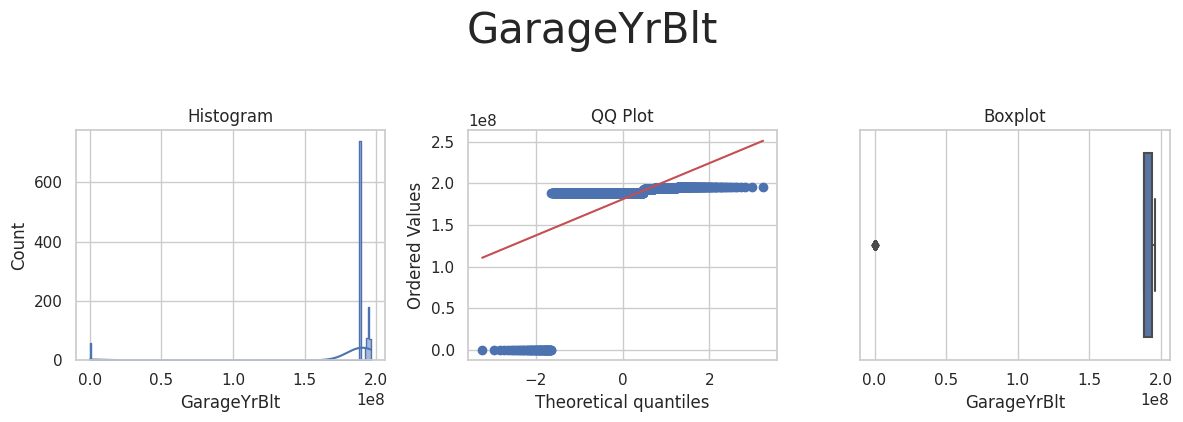

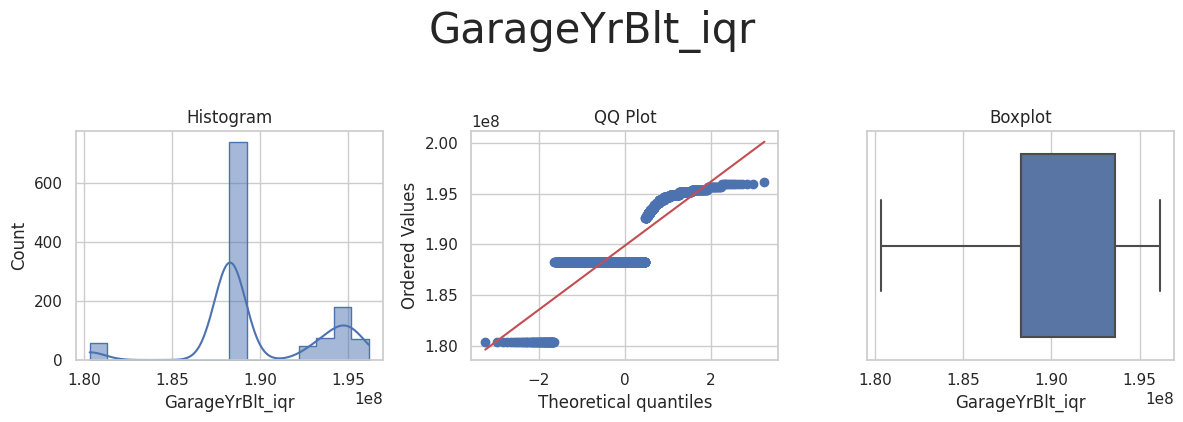



* Variable Analyzed: GrLivArea
* Applied transformation: ['GrLivArea_iqr']
* Skewness: 0.0 | Kurtosis: 0.15



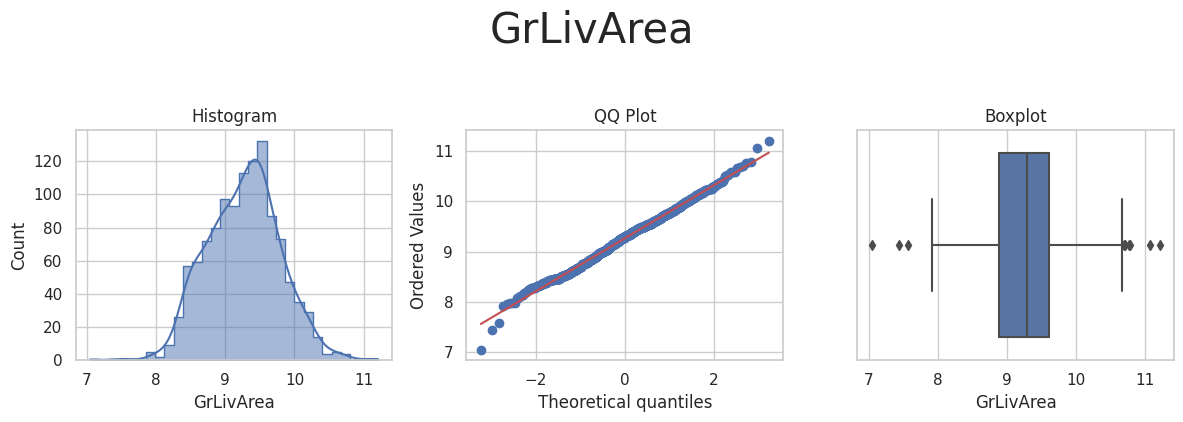

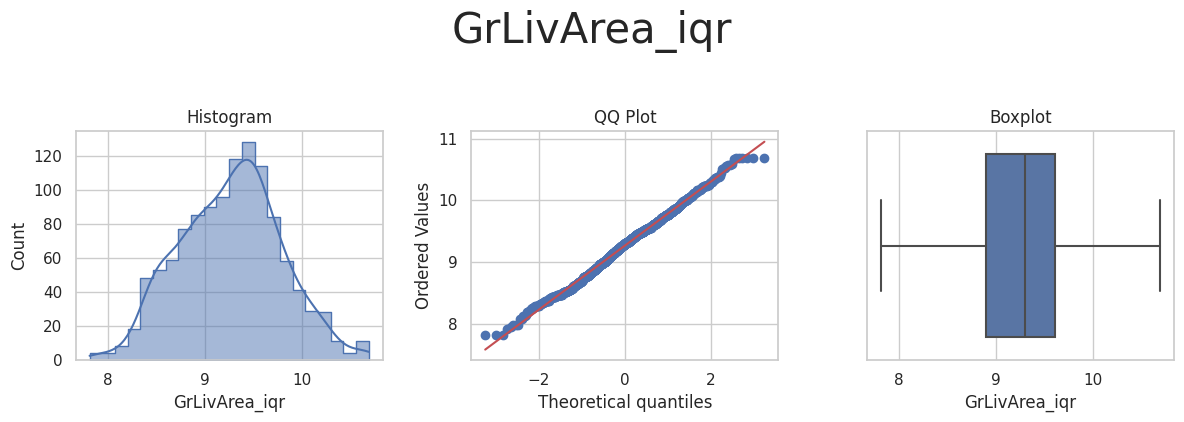



* Variable Analyzed: OverallQual
* Applied transformation: ['OverallQual_iqr']
* Skewness: 0.02 | Kurtosis: 0.28



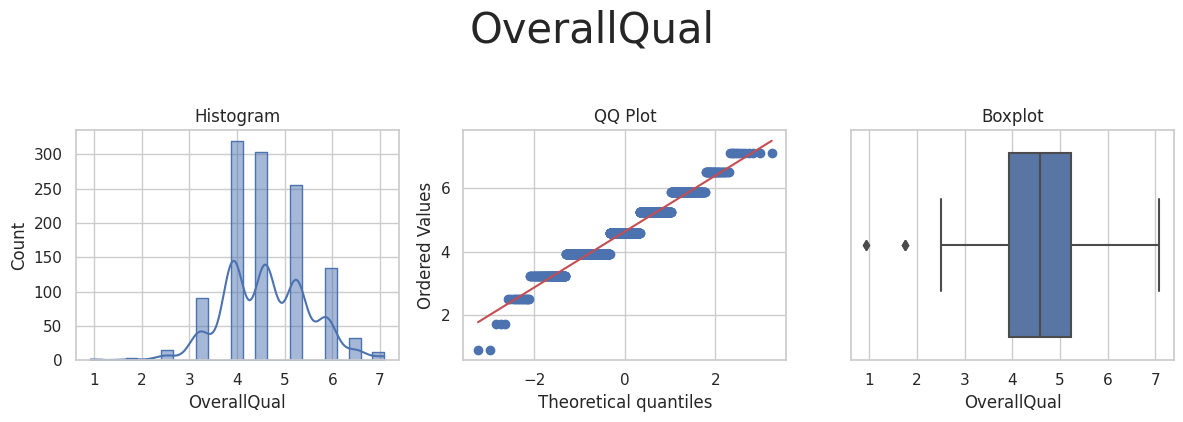

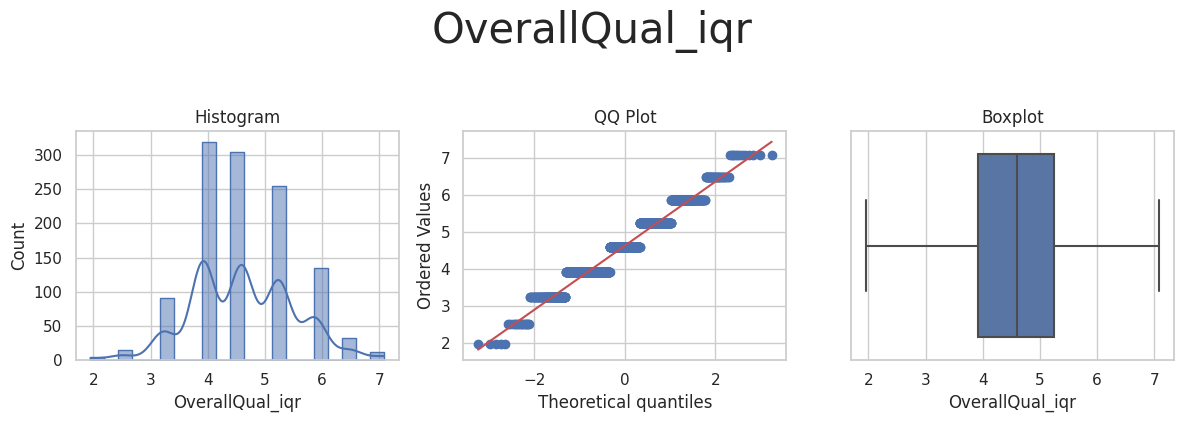



* Variable Analyzed: TotalBsmtSF
* Applied transformation: ['TotalBsmtSF_iqr']
* Skewness: 0.01 | Kurtosis: 2.06



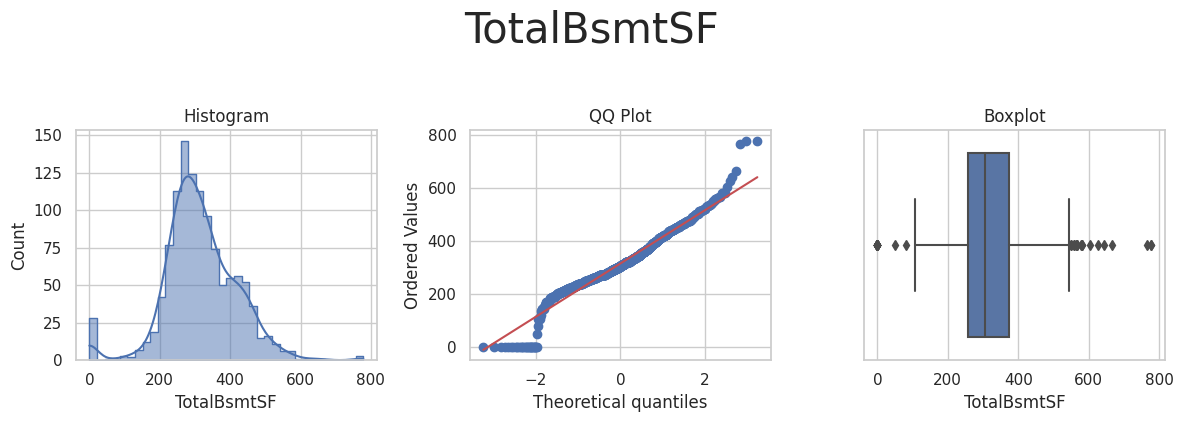

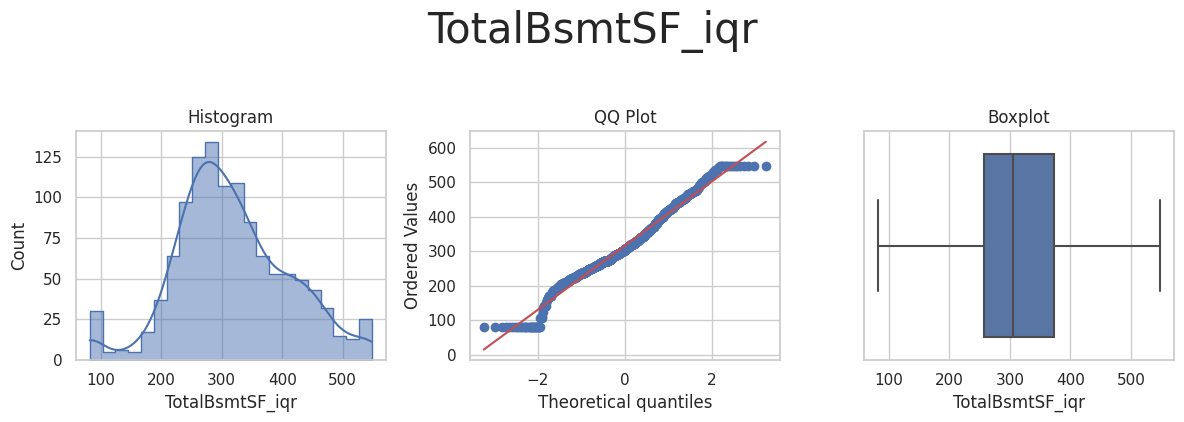



* Variable Analyzed: YearBuilt
* Applied transformation: ['YearBuilt_iqr']
* Skewness: -0.64 | Kurtosis: -0.37



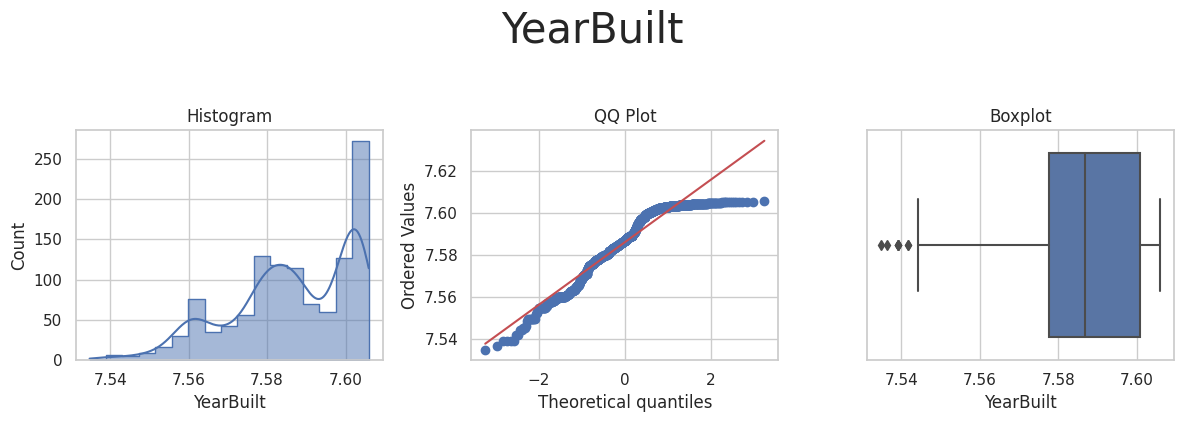

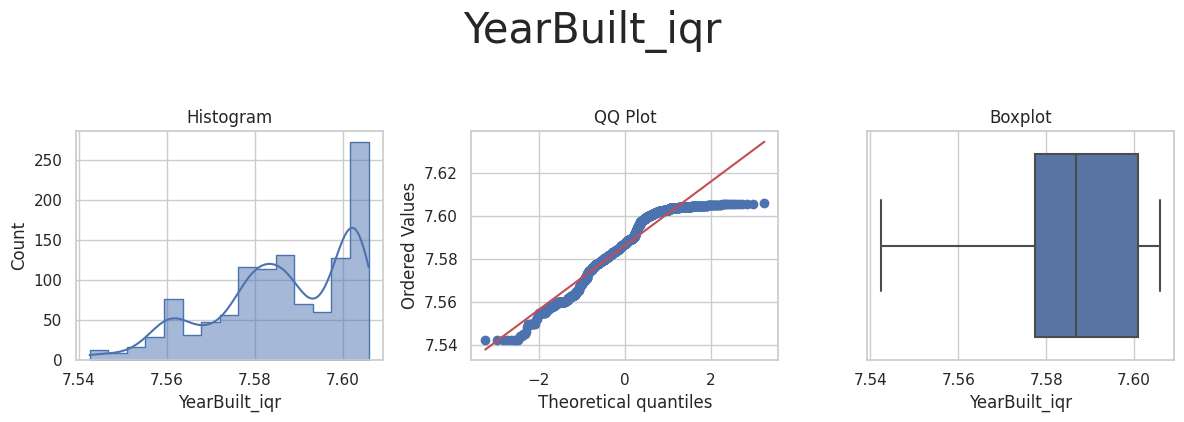

In [35]:
df_engineering = FeatureEngineeringAnalysis(df=df_engineering, analysis_type='outlier_winsorizer')

In [36]:
pipeline = Pipeline([
    ('winsorizer_iqr', Winsorizer(capping_method='iqr', fold=1.5, tail='both', variables = outlier_variables))
])
TrainSet = pipeline.fit_transform(TrainSet)
TestSet = pipeline.fit_transform(TestSet)

### Smart Correlated Selection

In [37]:
df_engineering = TrainSet.copy().drop(['SalePrice'], axis=1)
df_engineering.head()

FirFlrSF  GarageArea   GarageYrBlt  GrLivArea  KitchenQual  OverallQual  \
0  7.585316       774.0  1.953937e+08   9.643829     1.604888     6.484417   
1  6.857203       308.0  1.882884e+08   8.514203     1.233090     3.922905   
2  6.933857       432.0  1.882884e+08   8.630806     1.233090     3.922905   
3  7.504725       857.0  1.941129e+08   9.516345     1.604888     5.868985   
4  7.411301       843.0  1.938574e+08   9.369332     1.604888     5.238591   

   TotalBsmtSF  YearBuilt  
0   495.850351   7.604396  
1   280.785318   7.581720  
2   276.257124   7.560601  
3   439.843394   7.601902  
4   433.785653   7.601402

In [38]:
from feature_engine.selection import SmartCorrelatedSelection
corr_sel = SmartCorrelatedSelection(variables=None, method="spearman", threshold=0.8, missing_values='raise', selection_method="variance", 
                                    estimator='None')

corr_sel.fit_transform(df_engineering)
corr_sel.correlated_feature_sets_

[{'FirFlrSF', 'TotalBsmtSF'}, {'GarageYrBlt', 'YearBuilt'}]

In [39]:
corr_sel.features_to_drop_

['FirFlrSF', 'YearBuilt']

I initially had the threashold set to 0.6 but, this was suggested to drop four variables, which is half the amount. I changed the threashold to 0.8 which has suggested two variables being dropped - FirFlrSF and YearBuilt - which is a more comfortable amount and gives a very strong threashold of correlation  

---

# Conclusion

Feature Engineering Transformations

* Numerical Transformation: ['1stFlrSF', 'GarageYrBlt', 'GrLivArea', 'KitchenQual', 
                                'OverallQual', 'TotalBsmtSF', 'YearBuilt']
* Smart Correlated Selection: ['1stFlrSF', 'YearBuilt']